In [236]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [237]:
# Laden dataset
df = pd.read_csv('../../data/raw/export_insurance_portfolio_data_forecasting_2000_2025.csv')

# Filter de data vanaf Jaarmaand 201501
df = df[df['Jaar_Maand'] >= 201501]

In [238]:
# Laat de eerste paar rijen van de dataset zien
df.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
28,201507,Auto Particulier,BCS Polis,50,29585.43,106,59337.54,56,28886.31,0,...,0.0,0.0,38,20242.19,21107.99,591.708600,559.788113,0.0,0.0,0.0
29,201508,Auto Particulier,BCS Polis,106,59337.54,168,91685.32,65,32911.85,1,...,0.0,0.0,46,21866.59,22007.44,559.788113,545.745952,0.0,0.0,0.0
30,201509,Auto Particulier,BCS Polis,168,91685.32,216,111434.76,54,23342.33,6,...,0.0,0.0,26,12065.70,13365.58,545.745952,515.901666,0.0,0.0,0.0
31,201510,Auto Particulier,BCS Polis,216,111434.76,265,133615.83,57,26433.61,6,...,0.0,0.0,45,23305.39,23313.57,515.901666,504.210679,0.0,0.0,0.0
32,201511,Auto Particulier,BCS Polis,265,133615.83,309,157925.46,49,26034.01,5,...,0.0,0.0,27,14114.42,14585.22,504.210679,511.085631,0.0,0.0,0.0


In [239]:
# Bekijk de statistieken van de dataset
df.describe()

,Jaar_Maand,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,Geroyeerde_Jaarpremie,Prolongaties,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
count,2740.000000,2740.000000,2.740000e+03,2740.000000,2.740000e+03,2740.000000,2.740000e+03,2740.000000,2740.000000,2740.000000,2.740000e+03,2.740000e+03,2740.000000,2.740000e+03,2.740000e+03,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000
mean,202039.039781,6826.163139,3.677893e+06,6839.275547,3.701973e+06,105.539416,6.440573e+04,87.625547,49243.148161,486.267153,2.552805e+05,2.657935e+05,231.141971,1.377235e+05,1.384262e+05,605.037081,607.125256,10513.005755,548.284637,570.661996
std,308.057642,11641.759073,5.892633e+06,11652.997024,5.929001e+06,182.244834,1.061114e+05,157.641993,82886.580072,854.452964,4.216142e+05,4.415216e+05,1304.638809,7.989257e+05,7.991780e+05,152.337657,152.942193,28375.876814,220.977481,236.606350
min,201501.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-28797.420000,0.000000,0.000000
25%,201803.000000,965.000000,5.812225e+05,984.500000,5.860705e+05,14.000000,9.478450e+03,9.000000,5921.937500,39.000000,2.367580e+04,2.444274e+04,25.000000,1.755026e+04,1.732017e+04,500.146201,502.044422,0.000000,471.400277,480.702486
50%,202012.000000,2788.500000,1.686578e+06,2792.500000,1.693925e+06,45.000000,2.883770e+04,37.000000,22547.570000,194.000000,1.128133e+05,1.173521e+05,69.000000,4.435019e+04,4.485909e+04,575.033573,576.742800,1636.100000,551.110844,567.527538
75%,202307.000000,7488.500000,4.254677e+06,7491.250000,4.267128e+06,116.250000,7.357099e+04,91.250000,49955.435000,554.250000,3.074643e+05,3.159048e+05,188.000000,1.064427e+05,1.071464e+05,676.719341,679.676242,9310.052500,642.801833,675.226993
max,202512.000000,60512.000000,3.931488e+07,60512.000000,3.955505e+07,3180.000000,1.598273e+06,1326.000000,678281.680000,6543.000000,3.515939e+06,3.856362e+06,59937.000000,3.538899e+07,3.539776e+07,1206.315553,1218.299338,340422.340000,1407.300000,1558.930000


In [240]:
mean_labels_nb = df.groupby('Label_Naam')['NewBusiness'].mean().sort_values(ascending=False)
sum_labels_nb = df.groupby('Label_Naam')['NewBusiness'].sum().sort_values(ascending=False)

print("Gemiddelde NewBusiness per Label_Naam:")
print(mean_labels_nb)
print("\nTotale NewBusiness per Label_Naam:")
print(sum_labels_nb)

Gemiddelde NewBusiness per Label_Naam:
Label_Naam
BOVAG Polis           780.492424
Van Mossel Polis      292.746269
Toyota Polis          205.325758
Hedin Polis           177.674242
Renault Polis         150.769231
Kia Polis             107.477273
Hyundai Polis          89.159091
Peugeot Polis          84.212121
Suzuki Polis           75.878788
Stellantis Polis       58.093750
Geen Label             57.265152
Emil Frey Polis        52.262712
Nissan Polis           51.837398
Dealer Zeker Polis     49.583333
Opel Polis             44.367521
BCS Polis              42.547619
Citroen Polis          39.704545
Dacia Polis            22.829457
Lexus Polis            19.128788
Louwman Polis           3.174242
Mitsubishi Polis        1.031496
Subaru Polis            0.829268
DS Polis                0.727273
Name: NewBusiness, dtype: float64

Totale NewBusiness per Label_Naam:
Label_Naam
BOVAG Polis           103025
Toyota Polis           27103
Hedin Polis            23453
Van Mossel Polis       

1. NewBusiness (Nieuwe productie)

Gemiddelde en Volume: Sinds 2015 zien we een gemiddelde van ca. 106 nieuwe polissen per maand per label. De mediaan ligt op 45, wat aanzienlijk lager is dan het gemiddelde. Dit bevestigt dat de instroom in veel maanden stabiel en bescheiden is, maar dat de resultaten sterk worden beïnvloed door een aantal zeer sterke maanden of labels.

Volatilitieit: De standaardafwijking (182) is bijna twee keer zo hoog als het gemiddelde. Dit wijst op een grillig patroon. De instroom is gevoelig voor seizoensinvloeden en label-specifieke acties.

Uitschieters: De maximale waarde van 3.180 is fors, maar lager dan in de totale dataset 2000-2025 (7.263), wat suggereert dat de meest extreme uitschieters (mogelijk grote migraties) vooral in de vroege jaren van de dataset zaten.

Dominante Labels: De grootste drijvers van nieuwe business in deze periode zijn BOVAG Polis (gem. 780 per maand) en Van Mossel Polis (gem. 293 per maand).


2. Royementen (Uitstroom)

Retentie-indicator: Het gemiddelde aantal royementen is 88 per maand. Dit ligt lager dan de NewBusiness (106). De portefeuille vertoont dus nog steeds een gezonde groei.

Stabiliteit: De mediaan van 37 ligt erg dicht bij die van NewBusiness (45). Dit duidt op een zeer evenwichtige in- en uitstroom voor de gemiddelde maand bij de meeste labels.

Verhouding: Voor elke 1,2 (45/37=1,2) nieuwe polissen wordt er gemiddeld 1 opgezegd. Hoewel de ratio iets lager is dan in de totale dataset van 2000-2025, blijft de balans positief (Ratio > 1).


3. Prolongaties (Verlengingen)

De "Motor" van de portefeuille: Dit is met afstand de grootste categorie met een gemiddelde van 486 per maand. Dit onderstreept dat de bulk van de activiteiten bestaat uit het beheren van de bestaande portefeuille.

Portefeuille-omvang: Het maximale aantal prolongaties van 6.543 in één maand toont aan dat bepaalde labels een enorme 'base' hebben opgebouwd.

Voorspelbaarheid: Met een mediaan van 194 zien we dat de meeste labels een constante stroom aan verlengingen hebben, wat een solide basis biedt voor forecasting-modellen zoals SARIMA of ETS.

Samenvattende Conclusie (2015-2025):
Door te filteren vanaf 2015 zien we een realistischer beeld van de huidige operatie. De extreme uitschieters zijn verminderd, maar de groei blijft aanwezig (NewBusiness > Royementen).

Focus voor forecasting:
Omdat de standaardafwijking bij alle drie de variabelen nog steeds hoog is, zal het model rekening moeten houden met de sterke seizoenspatronen van de top-labels (zoals de enorme invloed van BOVAG Polis op de totalen). Het is aan te raden om voor de tijdreeksanalyse de data te aggregeren per maand om de "ruis" van kleinere labels te middelen, tenzij je specifiek per label wilt voorspellen.

In [241]:
# Bekijk de datatypes en het aantal niet-nul waarden
df.info()

<class 'pandas.DataFrame'>
Index: 2740 entries, 28 to 3386
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Jaar_Maand                              2740 non-null   int64  
 1   Product                                 2740 non-null   str    
 2   Label_Naam                              2740 non-null   str    
 3   Beginstand                              2740 non-null   int64  
 4   Jaarpremie_Beginstand                   2740 non-null   float64
 5   Eindstand                               2740 non-null   int64  
 6   Jaarpremie_Eindstand                    2740 non-null   float64
 7   NewBusiness                             2740 non-null   int64  
 8   Jaarpremie_NewBusiness                  2740 non-null   float64
 9   Royementen                              2740 non-null   int64  
 10  Geroyeerde_Jaarpremie                   2740 non-null   float64
 11  Prolon

In [242]:
# Get unique values for Product and Label_Naam
unique_products = df['Product'].unique()
unique_labels = df['Label_Naam'].unique()

# Count unique values
num_products = len(unique_products)
num_labels = len(unique_labels)

print(f"Unique Products ({num_products}):")
print(unique_products)
print(f"\nUnique Labels ({num_labels}):")
print(unique_labels)

Unique Products (1):
<StringArray>
['Auto Particulier']
Length: 1, dtype: str

Unique Labels (23):
<StringArray>
[         'BCS Polis',        'BOVAG Polis',      'Citroen Polis',
        'Dacia Polis', 'Dealer Zeker Polis',           'DS Polis',
    'Emil Frey Polis',         'Geen Label',        'Hedin Polis',
      'Hyundai Polis',          'Kia Polis',        'Lexus Polis',
      'Louwman Polis',   'Mitsubishi Polis',       'Nissan Polis',
         'Opel Polis',      'Peugeot Polis',      'Renault Polis',
   'Stellantis Polis',       'Subaru Polis',       'Suzuki Polis',
       'Toyota Polis',   'Van Mossel Polis']
Length: 23, dtype: str


Observaties:
Product-focus: Omdat er maar één product is (Auto Particulier), hoef je bij de aggregatie geen rekening te houden met verschillende productcategorieën. Je kunt de data direct groeperen op datum.

Label-diversiteit: De lijst bevat zowel grote dealergroepen (zoals Van Mossel en Hedin) als importeurs-labels (zoals Toyota en Kia).

Aggregatie-keuze: Als we gaan aggregeren, tellen we de waarden van al deze 23 labels bij elkaar op per maand. Dit geeft je een totaalbeeld van de "Auto Particulier" markt binnen deze dataset.

Visualiseren van distributies...


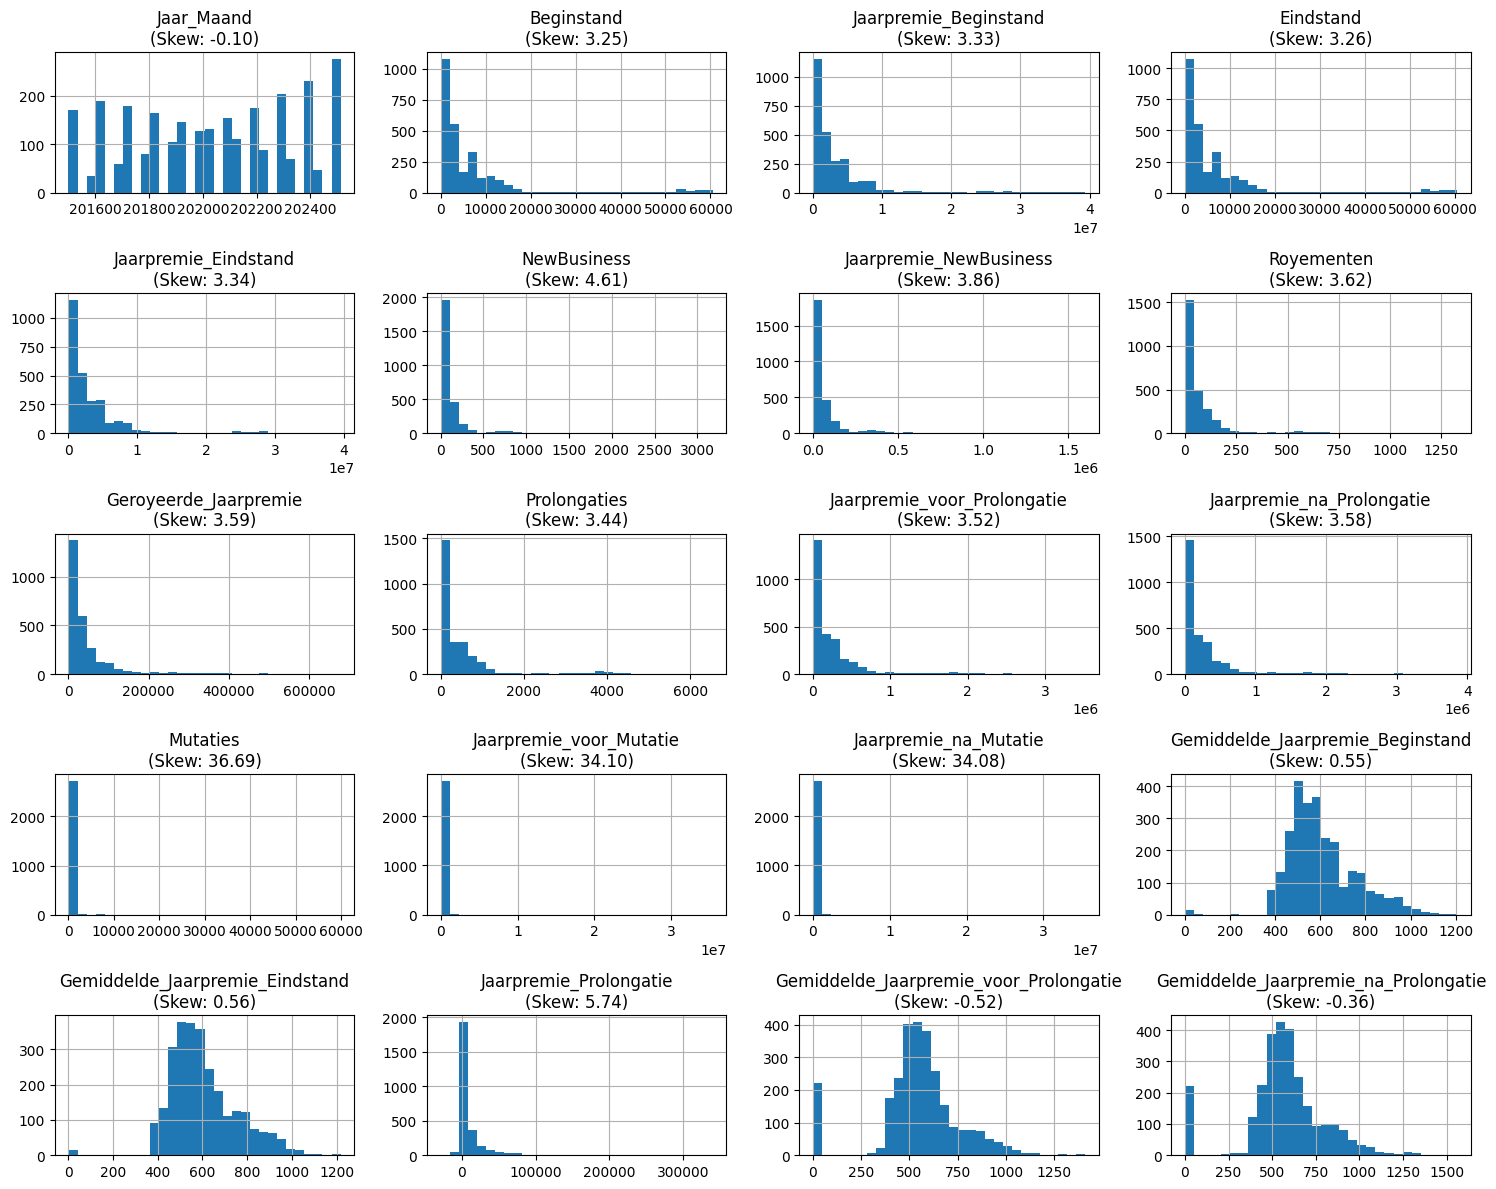

Skewness per feature:
Jaar_Maand                                -0.096299
Beginstand                                 3.252437
Jaarpremie_Beginstand                      3.332403
Eindstand                                  3.259655
Jaarpremie_Eindstand                       3.339681
NewBusiness                                4.605525
Jaarpremie_NewBusiness                     3.859902
Royementen                                 3.621135
Geroyeerde_Jaarpremie                      3.589542
Prolongaties                               3.442244
Jaarpremie_voor_Prolongatie                3.515013
Jaarpremie_na_Prolongatie                  3.579418
Mutaties                                  36.688769
Jaarpremie_voor_Mutatie                   34.101110
Jaarpremie_na_Mutatie                     34.081003
Gemiddelde_Jaarpremie_Beginstand           0.552800
Gemiddelde_Jaarpremie_Eindstand            0.561476
Jaarpremie_Prolongatie                     5.740236
Gemiddelde_Jaarpremie_voor_Prolongatie    

In [243]:
# Distributie van alle numerieke features
print("Visualiseren van distributies...")

# 1. Selecteer de numerieke kolommen
numeric_df = df.select_dtypes(include=[np.number])

# 2. Bereken de skewness voor deze kolommen
skewness_values = numeric_df.skew()

# 3. Plot de histogrammen en vang de 'axes' op
axes = numeric_df.hist(figsize=(15, 12), bins=30)

# 4. Loop door de assen en voeg de skewness toe aan de titel
for ax in axes.flatten():
    title = ax.get_title()
    if title in skewness_values.index:
        skew_val = skewness_values[title]
        ax.set_title(f"{title}\n(Skew: {skew_val:.2f})")

plt.tight_layout()
plt.show()

# Print de waarden ook even in de console voor het overzicht
print("Skewness per feature:")
print(skewness_values)

De distributie-analyse van de numerieke features (vanaf januari 2015) laat een heel specifiek beeld zien dat typerend is voor verzekeringsportfolio's. Hieronder volgt de analyse van wat we zien in de histogrammen en de berekende scheefheid (skewness) van de data.


1. Sterke Rechts-scheve Verdeling (Positive Skew)

De meeste features, waaronder NewBusiness, Royementen en Prolongaties, vertonen een sterke "long-tail" naar rechts.
- Wat je ziet: De hoogste balken in de histogrammen staan helemaal links (lage waarden). Naarmate de waarden op de x-as hoger worden, worden de balkjes heel snel kleiner.
- Interpretatie: Het merendeel van de labels/product-combinaties in de dataset is relatief klein (bijv. Lexus of Suzuki). De enorme uitschieters aan de rechterkant van de grafiek worden veroorzaakt door de dominante labels zoals BOVAG en Van Mossel.
- Model-impact: Omdat de data zo scheef is, kan het voor modellen als SARIMA soms helpen om een log-transformatie te doen, zodat uitschieters minder dominant worden en het model beter de algemene trend leert.

2. De "Targets": NewBusiness, Royementen en Prolongaties
- NewBusiness & Royementen: Deze lijken qua vorm sterk op elkaar. Ze hebben beide een hoge skewness (resp. 4.6 en 3.6). Dit bevestigt dat in- en uitstroom vaak hand in hand gaan: labels met veel nieuwe klanten hebben vaak ook een grotere uitstroom.
- Prolongaties: Deze vertoont een vergelijkbaar patroon maar met hogere absolute waarden op de x-as. Het feit dat de 'tail' hier zo lang is, geeft aan dat de spreiding tussen de kleinste en grootste labels enorm is.

3. Mutaties: De extreme uitschieters

De kolom Mutaties heeft een extreem hoge skewness (36.7).
- Wat je ziet: In het histogram zie je waarschijnlijk één hele hoge piek bij 0 en bijna niets anders, behalve een paar stipjes heel ver naar rechts.
- Interpretatie: Mutaties (bijvoorbeeld wijzigingen in dekking of adres) komen bij de meeste labels nauwelijks voor of worden niet consistent geregistreerd, behalve bij zeer specifieke gebeurtenissen of hele grote labels. Deze kolom is minder geschikt als voorspeller omdat de data te "sparse" (leeg) is.

4. Gemiddelde Jaarpremies: De uitzondering

De features zoals Gemiddelde_Jaarpremie_Beginstand/Eindstand laten een heel ander beeld zien.
- Wat je ziet: Deze histogrammen lijken veel meer op een "normaalverdeling" (de bekende klokvorm). De skewness ligt hier tussen de -0.5 en 0.5.
- Interpretatie: Hoewel het aantal polissen per label enorm verschilt, is de gemiddelde premie per polis vrij stabiel over de hele linie. De meeste polissen hebben een jaarpremie die rond een centraal gemiddelde ligt. Dit is een stabiele factor in de dataset.

5. Eindstand en Beginstand

Deze kolommen zijn vrijwel identiek in hun distributie. Dit is logisch, aangezien de eindstand van maand $t$ de beginstand van maand $t+1$ is. De sterke rechts-scheve verdeling hier laat zien dat de totale waarde van de portefeuille geconcentreerd is bij een klein aantal zeer grote spelers.

Conclusie voor de vervolgstap:

De distributies laten zien dat je niet te maken hebt met "gemiddelde" data, maar met een dataset die gedomineerd wordt door uitschieters (de grote labels). Voor het tijdreeksmodel is het daarom verstandig om:
- Ofwel de data te aggregeren naar een totaalniveau (alle labels bij elkaar opgeteld), waardoor de distributie iets stabieler wordt.
- Ofwel een log-transformatie te overwegen als je per label gaat voorspellen, om de invloed van de extreme uitschieters te beperken.

Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.


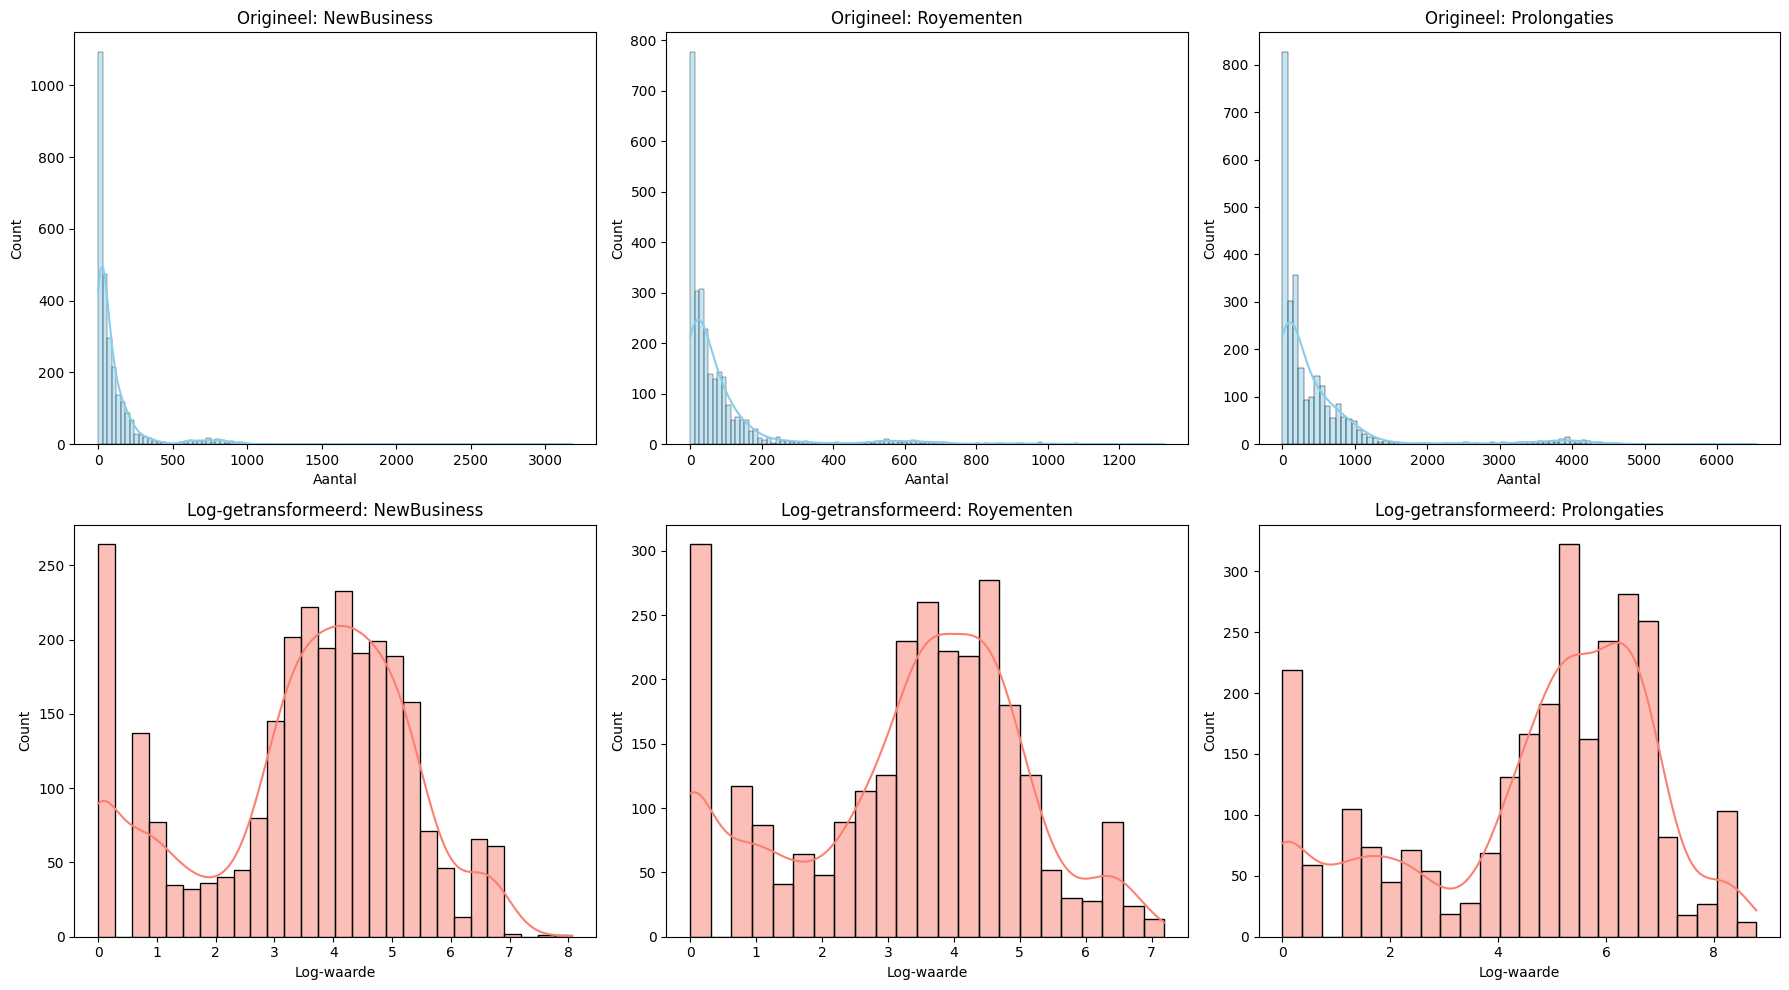

Statistische Tabel:
              Skewness (Orig)  Kurtosis (Orig)  Skewness (Log)  Kurtosis (Log)
NewBusiness          4.605525        40.552300       -0.536592       -0.481446
Royementen           3.621135        14.990591       -0.430635       -0.555954
Prolongaties         3.442244        12.903342       -0.760867       -0.365440


In [244]:
# Distributie van de targets (Royementen, NewBusiness, Prolongaties) en hun statistieken (skewness, kurtosis)
print("Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.")

# Targets definiëren
targets = ['NewBusiness', 'Royementen', 'Prolongaties']

# Bereken statistieken voor originele data
stats_orig = pd.DataFrame({
    'Skewness (Orig)': df[targets].skew(),
    'Kurtosis (Orig)': df[targets].kurtosis()
})

# Log-transformatie toepassen (log1p = log(x+1) om 0-waarden te kunnen verwerken)
df_log = np.log1p(df[targets])
df_log.columns = [f'Log_{col}' for col in targets]

# Bereken statistieken voor getransformeerde data
stats_log = pd.DataFrame({
    'Skewness (Log)': df_log.skew(),
    'Kurtosis (Log)': df_log.kurtosis()
})

# Visualisatie: Vergelijking voor en na transformatie
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Bovenste rij: Originele distributies
    sns.histplot(df[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Origineel: {col}')
    axes[0, i].set_xlabel('Aantal')
    
    # Onderste rij: Getransformeerde distributies
    sns.histplot(df_log[f'Log_{col}'], kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Log-getransformeerd: {col}')
    axes[1, i].set_xlabel('Log-waarde')

plt.tight_layout()
plt.show()

# Combineer resultaten in een tabel
final_stats = pd.concat([stats_orig, stats_log.set_index(stats_orig.index)], axis=1)
print("Statistische Tabel:")
print(final_stats)

Analyse van de resultaten
De analyse richt zich op de geschiktheid van de data voor een SARIMA-model op basis van de periode 2015-2025.
1. Vóór de transformatie (Blauwe grafieken)
- Extreem "Right-Skewed": De originele data vertoont een klassieke "L-vorm". De overgrote meerderheid van de waarden per label is laag, met een zeer dunne maar extreem lange staart naar rechts. De skewness-waarden (bijv. $4.61$ voor NewBusiness) bevestigen deze sterke asymmetrie.
- Hoge Kurtosis: De kurtosis-waarden zijn aanzienlijk hoog, met een piek van $40.55$ voor NewBusiness en $14.99$ voor Royementen. Dit betekent dat uitschieters (de grote labels en incidentele pieken) de verdeling volledig domineren en ver boven het gemiddelde uitsteken.
- Probleem voor SARIMA: Een SARIMA-model probeert fouten te minimaliseren die normaliter rond het gemiddelde liggen. Bij deze ruwe data zal het model de uitschieters proberen te "fitten", wat leidt tot zeer onbetrouwbare voorspellingen voor de normale maanden en labels.

2. Na de Log-transformatie (Rode grafieken)
- Normalisering: De log-transformatie ($log(x+1)$) heeft de "staart" succesvol ingetrokken en de data bij de nul-lijn (de vele kleine labels) meer gespreid.
- Skewness richting nul: De scheefheid is drastisch gedaald. Voor alle drie de variabelen ligt de nieuwe skewness nu tussen de $-0.43$ en $-0.76$. Dit valt ruim binnen de bandbreedte van $-1$ tot $1$, wat als een "vrijwel normale verdeling" wordt beschouwd. Dit is ideaal voor lineaire tijdreeksmodellen.
- Kurtosis reductie: De kurtosis is nu licht negatief geworden (tussen de $-0.37$ en $-0.56$). Dit betekent dat de verdeling iets platter is dan een perfecte normaalverdeling, maar cruciaal is dat de gevaarlijke extreme pieken van de originele data volledig zijn verdwenen.

Conclusie voor het model:

Door de log-transformatie te gebruiken, is de variantie gestabiliseerd. Dit is een cruciale voorwaarde voor methoden zoals SARIMA die uitgaan van een constante spreiding (homoscedasticiteit).

Advies: 

Train het SARIMA-model op de Log-getransformeerde data. Bij het presenteren van de resultaten of het maken van rapportages voer je de inverse bewerking uit (np.expm1()) om de voorspelde waarden weer terug te rekenen naar de oorspronkelijke aantallen polissen. Dit zorgt voor een wiskundig zuiver model met resultaten die voor de business begrijpelijk blijven.

Visualiseren van boxplots voor originele en getransformeerde data.
Aantal uitschieters (Original) per feature:
{'NewBusiness': 227, 'Royementen': 228, 'Prolongaties': 172}


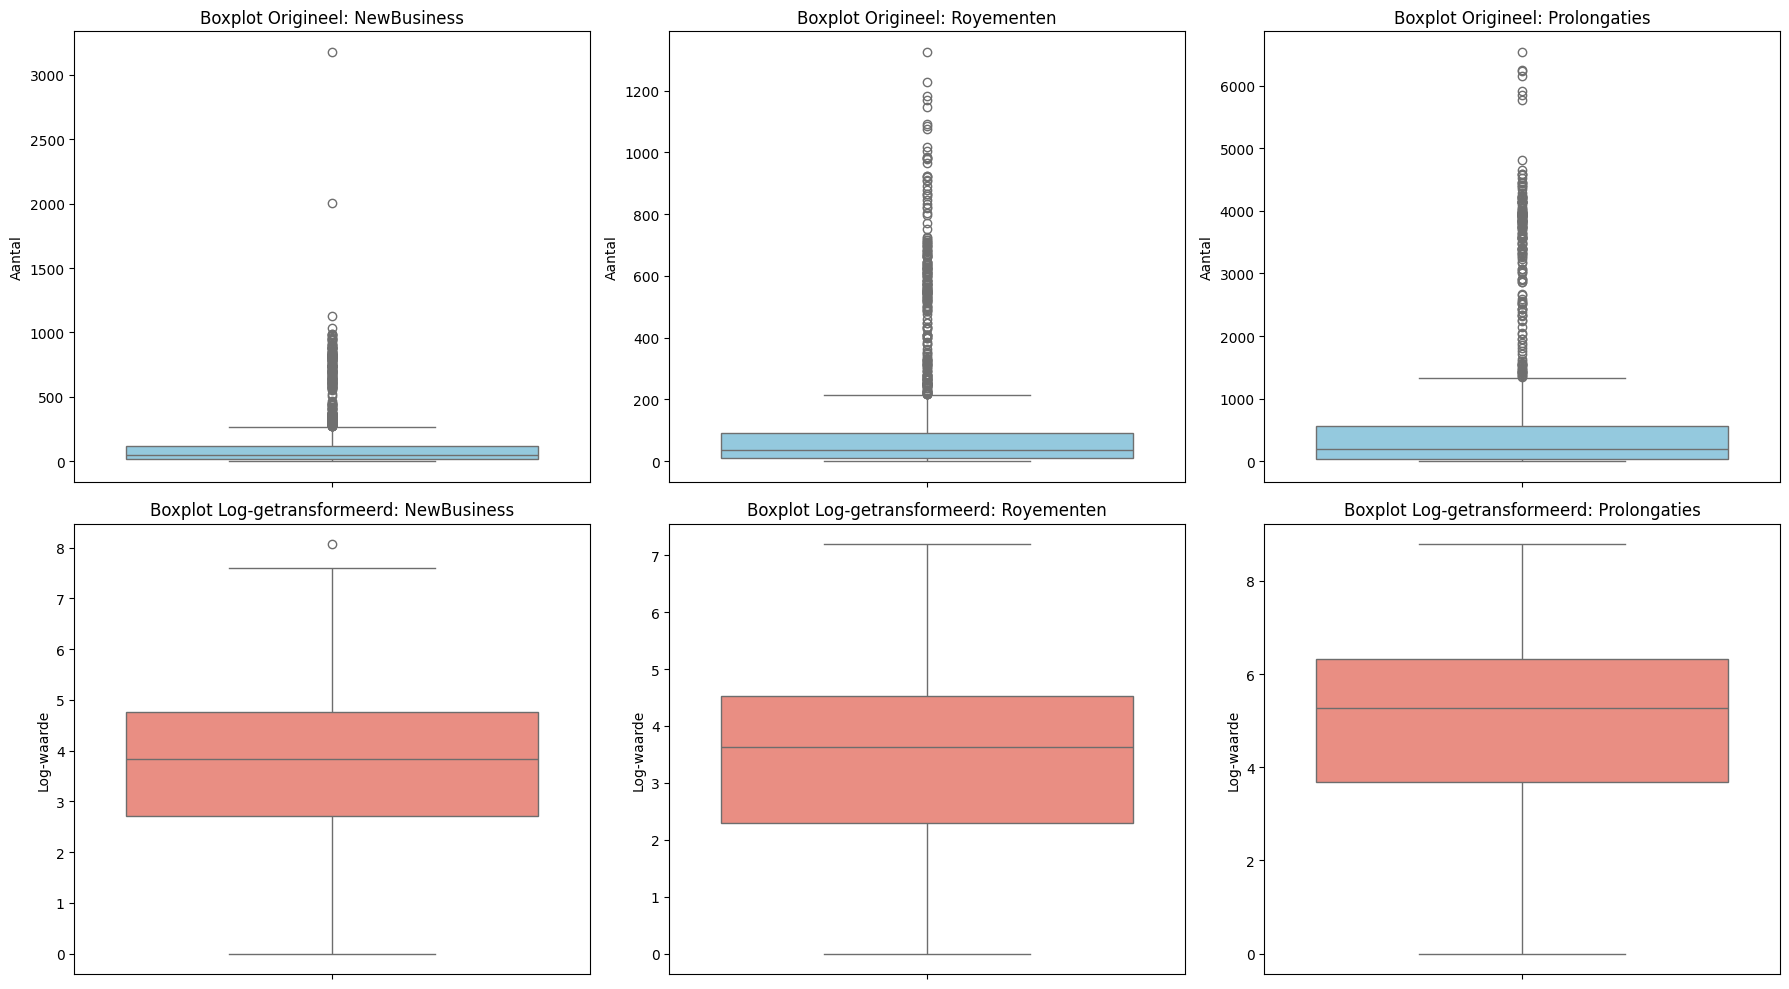

In [245]:
# Boxplots van de targets voor en na transformatie
print("Visualiseren van boxplots voor originele en getransformeerde data.")

# Visualisatie: Boxplots vergelijking
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Originele boxplots
    sns.boxplot(y=df[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Boxplot Origineel: {col}')
    axes[0, i].set_ylabel('Aantal')
    
    # Log-getransformeerde boxplots
    sns.boxplot(y=df_log[f'Log_{col}'], ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Boxplot Log-getransformeerd: {col}')
    axes[1, i].set_ylabel('Log-waarde')

plt.tight_layout()
#plt.savefig('boxplot_comparison.png')

# Statistieken over outliers (IQR methode) voor de tekstuele analyse
outlier_summary = {}
for col in targets:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outlier_summary[col] = len(outliers)

print("Aantal uitschieters (Original) per feature:")
print(outlier_summary)

Analyse van de gemaakte boxplots

De boxplot-analyse op de ongeaggregeerde data (vanaf 201501) geeft een duidelijk visueel bewijs van de noodzaak voor datatransformatie. 
Hieronder volgen de resultaten en de bijbehorende analyse.

Aantal uitschieters (Original) per feature (IQR methode):
- NewBusiness: 227 uitschieters
- Royementen: 228 uitschieters
- Prolongaties: 172 uitschieters


Analyse van de resultaten

1. Aantal uitschieters (Blauwe boxplots - Origineel)

In de originele data vallen honderden datapunten buiten het normale bereik ($227$ bij NewBusiness, $228$ bij Royementen en $172$ bij Prolongaties).
- De "whisker" (de snorhaar) van de boxplot is heel kort vergeleken met de enorme reeks punten daarboven.
- Dit bevestigt dat de dataset gedomineerd wordt door enkele zeer grote labels/maanden, terwijl de 'normale' business zich in een veel kleiner bereik bevindt.

2. Resultaat na Log-transformatie (Rode boxplots - Getransformeerd)

De onderste rij boxplots toont een veel gezonder en evenwichtiger beeld.
- Inkorten van de staart: De enorme "wolk" aan uitschieters is drastisch ingekort en dichter bij de box komen te liggen.
- Symmetrie: De boxen (die het 25e tot 75e percentiel weergeven) zijn nu meer gecentreerd, wat duidt op een verdeling die de normaalverdeling veel dichter benadert.
- Gezonder signaal: Voor een SARIMA-model betekent dit dat het model niet langer "gehypnotiseerd" wordt door een paar gigantische pieken, maar ook de subtiele trends en seizoensinvloeden in de normale maanden effectief kan leren.


Conclusie voor het model:

De boxplots bevestigen dat een transformatie noodzakelijk is voor een betrouwbare tijdreeksanalyse. Zonder deze stap zou je model (of dat nu SARIMA of ETS is) waarschijnlijk zeer onnauwkeurige voorspellingen doen voor de "normale" maanden, omdat het teveel wiskundig gewicht toekent aan de extreme uitschieters van de grote labels.
Door de log-getransformeerde data als input te gebruiken, dwing je het model om te kijken naar de procentuele groei en krimp, in plaats van naar de absolute (vaak vertekende) aantallen.

In [246]:
# Aggregatie op totaal niveau per maand (Jaar_Maand)

# Voor aantallen en bedragen gebruiken we de som (sum)
# Voor gemiddelden gebruiken we het gemiddelde (mean)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
agg_logic = {}

for col in num_cols:
    if col == 'Jaar_Maand':
        continue
    if 'Gemiddelde' in col:
        agg_logic[col] = 'mean'
    else:
        agg_logic[col] = 'sum'

# Data groeperen per Jaar_Maand
df_agg = df.groupby('Jaar_Maand').agg(agg_logic).reset_index()

# Datum-kolom toevoegen voor tijdreeksanalyse
df_agg['Datum'] = pd.to_datetime(df_agg['Jaar_Maand'].astype(str), format='%Y%m')
df_agg.set_index('Datum', inplace=True)

# Resultaat controleren
print(df_agg.head())

            Jaar_Maand  Beginstand  Jaarpremie_Beginstand  Eindstand  \
Datum                                                                  
2015-01-01      201501      115580            48395329.24     116458   
2015-02-01      201502      116458            48739723.42     117233   
2015-03-01      201503      117234            48975848.17     118061   
2015-04-01      201504      118062            49328357.04     118463   
2015-05-01      201505      118463            49487040.46     118877   

            Jaarpremie_Eindstand  NewBusiness  Jaarpremie_NewBusiness  \
Datum                                                                   
2015-01-01           48739723.42         2815              1258591.55   
2015-02-01           48975401.40         2329              1019448.11   
2015-03-01           49327829.50         2586              1129439.25   
2015-04-01           49487040.46         2105               933827.22   
2015-05-01           49682125.51         2104            

Visualiseren van distributies van de geaggregeerde data...


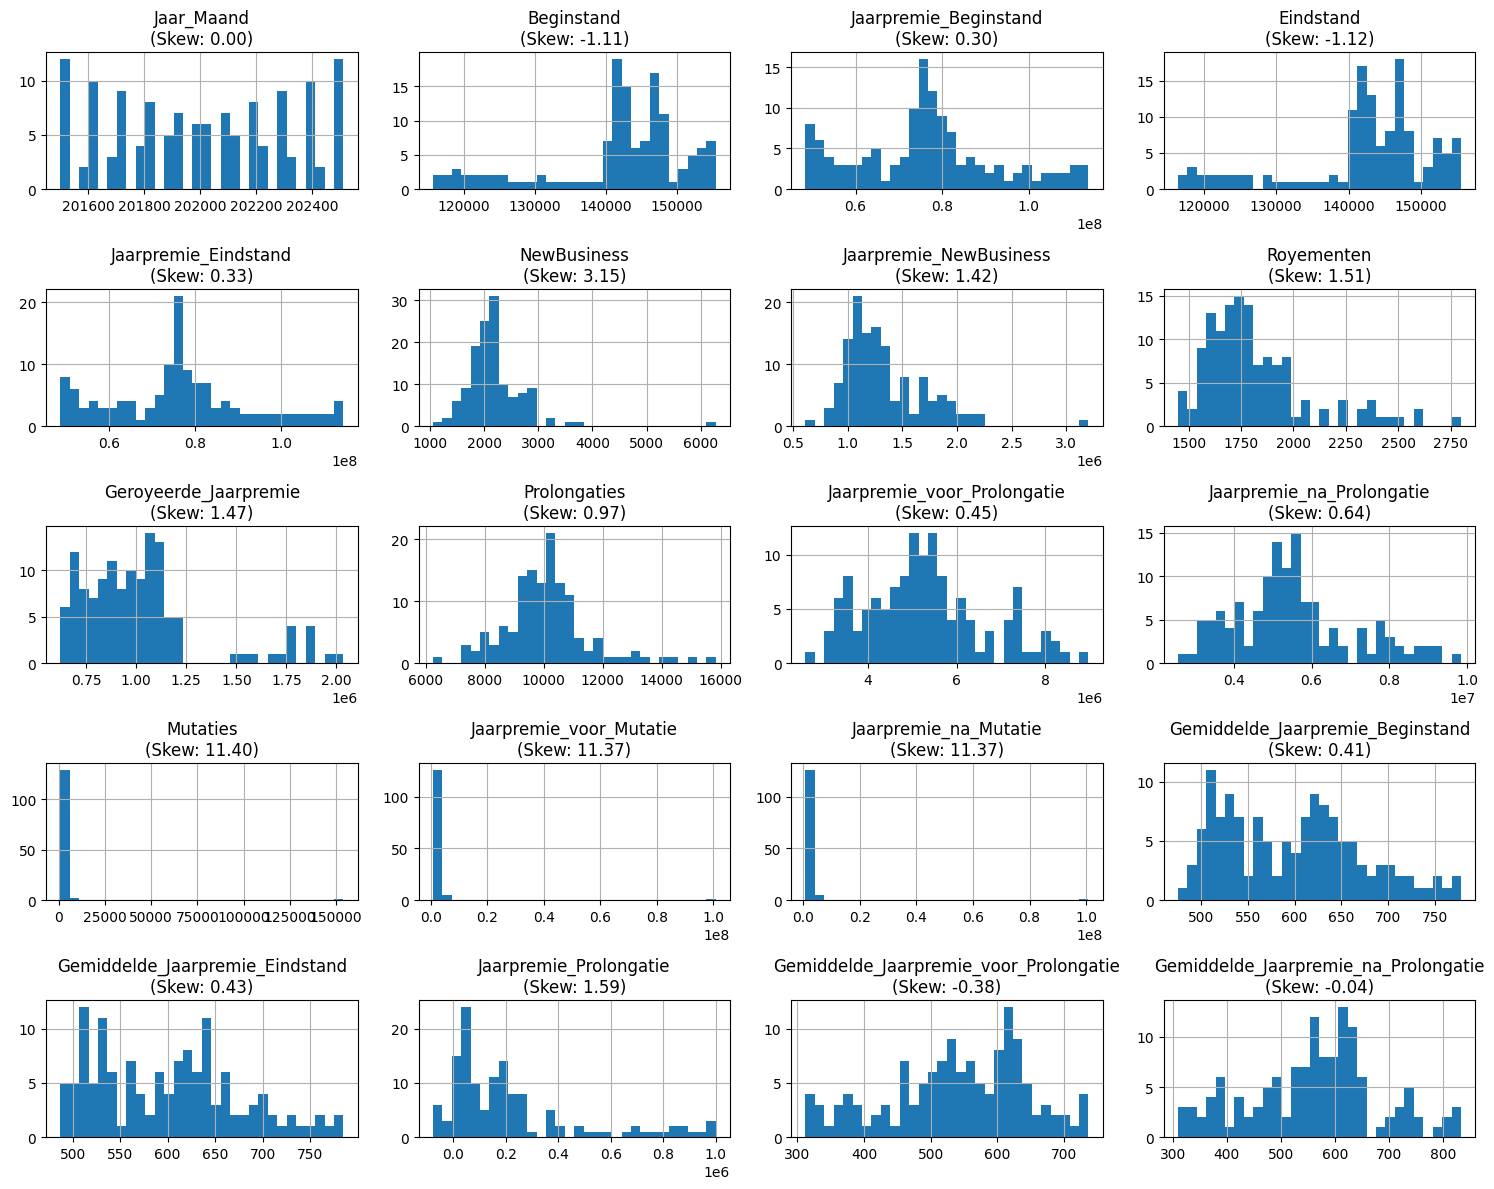

Skewness per feature:
Jaar_Maand                                 0.000000
Beginstand                                -1.114298
Jaarpremie_Beginstand                      0.297844
Eindstand                                 -1.119620
Jaarpremie_Eindstand                       0.328132
NewBusiness                                3.149232
Jaarpremie_NewBusiness                     1.423461
Royementen                                 1.508684
Geroyeerde_Jaarpremie                      1.465357
Prolongaties                               0.965959
Jaarpremie_voor_Prolongatie                0.450913
Jaarpremie_na_Prolongatie                  0.642048
Mutaties                                  11.400219
Jaarpremie_voor_Mutatie                   11.368297
Jaarpremie_na_Mutatie                     11.365662
Gemiddelde_Jaarpremie_Beginstand           0.411762
Gemiddelde_Jaarpremie_Eindstand            0.431505
Jaarpremie_Prolongatie                     1.593876
Gemiddelde_Jaarpremie_voor_Prolongatie    

In [247]:
# Distributie van alle numerieke features
print("Visualiseren van distributies van de geaggregeerde data...")

# 1. Selecteer de numerieke kolommen
numeric_df_agg = df_agg.select_dtypes(include=[np.number])

# 2. Bereken de skewness voor deze kolommen
skewness_values = numeric_df_agg.skew()

# 3. Plot de histogrammen en vang de 'axes' op
axes = numeric_df_agg.hist(figsize=(15, 12), bins=30)

# 4. Loop door de assen en voeg de skewness toe aan de titel
for ax in axes.flatten():
    title = ax.get_title()
    if title in skewness_values.index:
        skew_val = skewness_values[title]
        ax.set_title(f"{title}\n(Skew: {skew_val:.2f})")

plt.tight_layout()
plt.show()

# Print de waarden ook even in de console voor het overzicht
print("Skewness per feature:")
print(skewness_values)

Hieronder volgt de analyse van de distributies van de geaggregeerde data (maandtotalen vanaf januari 2015).

1. Van "Long-tail" naar "Unimodaal" (Verbeterde Skewness)

Hoewel er nog steeds een scheefheid naar rechts is, is het beeld veel minder extreem dan op label-niveau.
- Wat je ziet: De "L-vorm" is grotendeels verdwenen. Voor veel features zie je nu een duidelijke 'bult' (unimodaal) in het midden of aan de rechterkant van de grafiek.
- Interpretatie: Doordat we de 23 labels hebben opgeteld, kijken we nu naar het collectieve volume van de markt. De spreiding wordt nu niet meer bepaald door het verschil tussen kleine en grote labels, maar door het verschil tussen "rustige" en "drukke" maanden in het jaar.
- Model-impact: De data is nu veel stabieler. De noodzaak voor een log-transformatie is voor features als Eindstand en Prolongaties technisch gezien minder groot geworden, al blijft het voor de grilligheid van NewBusiness sterk aanbevolen.

2. De "Targets": NewBusiness, Royementen en Prolongaties
- NewBusiness: Blijft de meest uitdagende feature met een skewness van 3.15 (was 4.6). Er zijn nog steeds maanden met extreme uitschieters (pieken boven de 6.000). Dit zijn de momenten die het SARIMA-model kunnen verstoren als je ze niet dempt.
- Royementen: De skewness is fors gedaald naar 1.51 (was 3.6). De uitstroom is op marktniveau veel constanter dan per individueel label.
- Prolongaties: Dit is de meest 'brave' feature geworden met een skewness van slechts 0.97 (was 3.4). De verdeling is nu nagenoeg symmetrisch, wat duidt op een zeer voorspelbaar basisvolume van de portefeuille.

3. Mutaties: Nog steeds grillig

De kolom Mutaties houdt een hoge skewness (11.4), hoewel dit veel lager is dan de 36.7 van voorheen.
- Wat je ziet: Nog steeds een sterke concentratie aan de linkerkant met enkele uitschieters.
- Interpretatie: Zelfs op totaalniveau blijven mutaties (poliswijzigingen) incidenteel of batch-gewijs voorkomen. Voor het forecast-model voor Royementen blijft deze kolom waarschijnlijk een minder betrouwbare voorspeller.

4. Gemiddelde Jaarpremies: Bijna perfect normaal

Features zoals Gemiddelde_Jaarpremie_na_Prolongatie (skewness -0.04) zijn nu nagenoeg perfect normaal verdeeld.
- Interpretatie: Dit bevestigt dat de gemiddelde prijs die een klant betaalt op marktniveau extreem stabiel is. Schommelingen in de totale omzet komen dus puur door volume (aantal polissen) en niet door enorme prijswijzigingen.

5. Eindstand en Beginstand
- Opvallend: de skewness is hier negatief (-1.11).
- Wat je ziet: De meeste balken staan rechts, met een staartje naar links.
- Interpretatie: Dit weerspiegelt de groei van je portefeuille sinds 2015. De lage waarden (links) zijn de beginjaren, en de massa aan de rechterkant zijn de recente jaren waar de portefeuille groter is. Dit duidt op een sterke opwaartse trend.

Conclusie voor je vervolgstap na aggregatie:

De aggregatie heeft de data "gezuiverd" van de extreme label-specifieke uitschieters.

NewBusiness is de enige target die nog een log-transformatie echt 'nodig' heeft om de resterende maand-pieken te dempen.

De negatieve skewness bij Eindstand herinnert ons eraan dat er een sterke trend in de data zit; het SARIMA-model zal dus zeker een "d" (differencing) parameter nodig hebben om deze trend te verwerken.

Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.


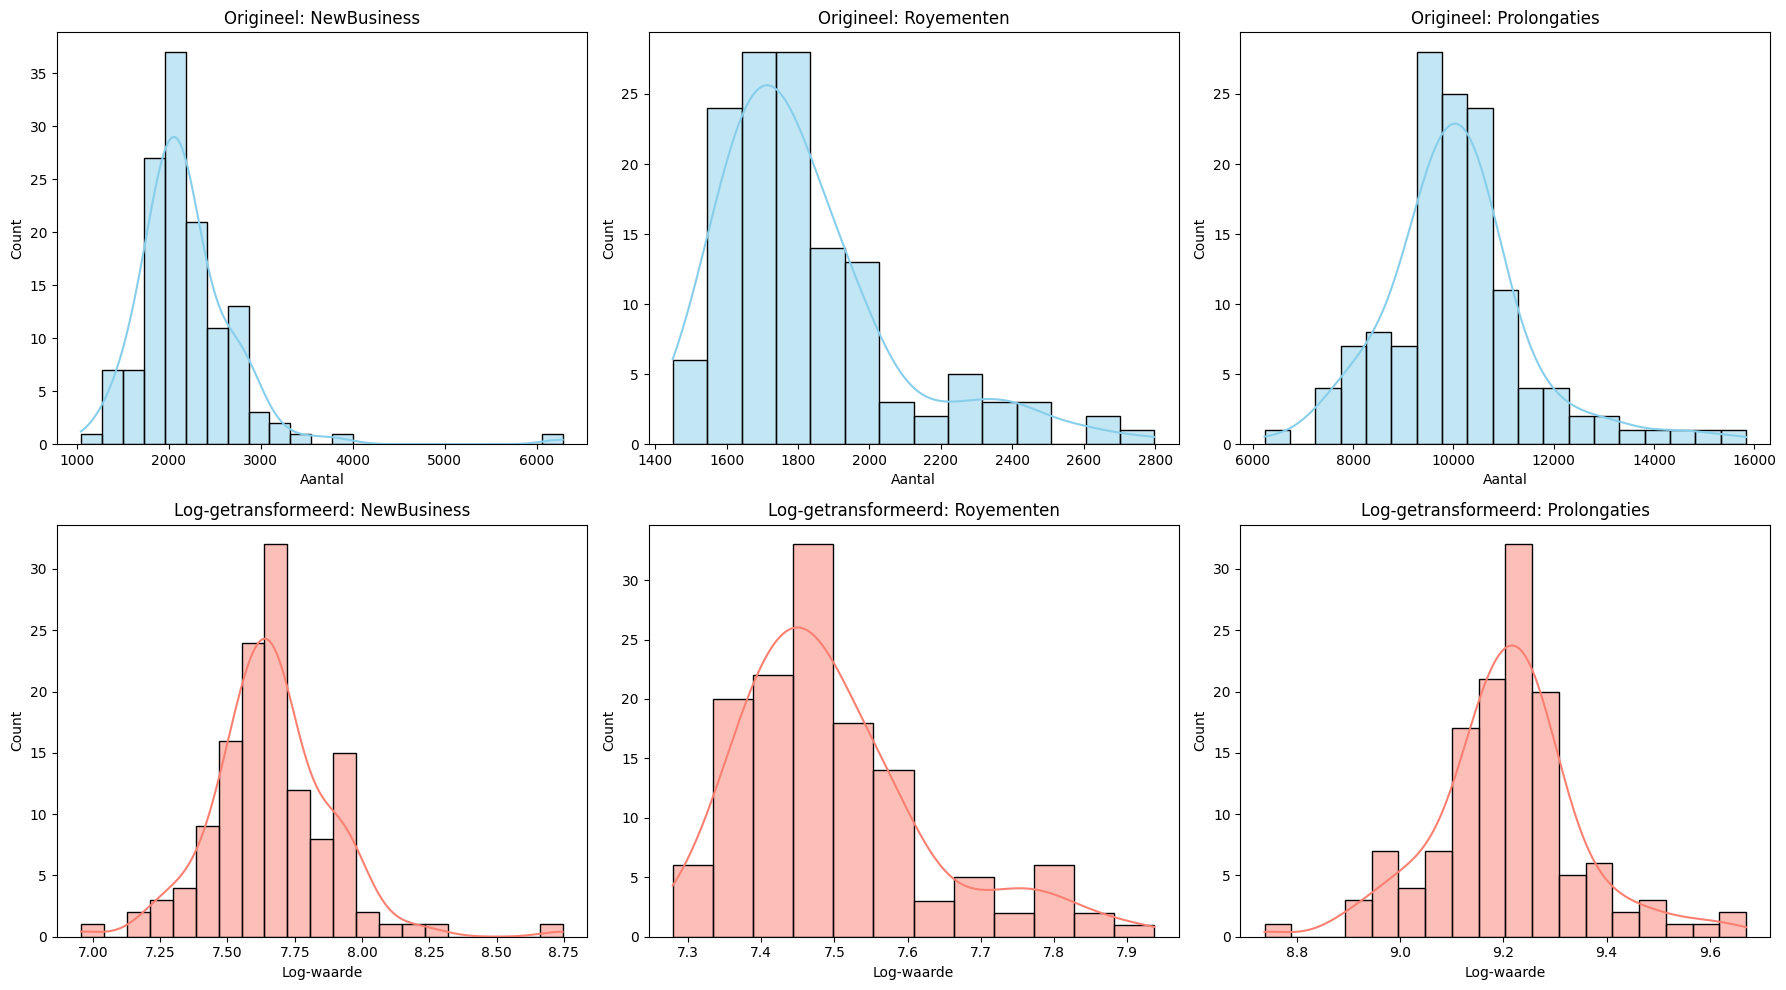

Statistische Tabel:
              Skewness (Orig)  Kurtosis (Orig)  Skewness (Log)  Kurtosis (Log)
NewBusiness          3.149232        20.059954        0.725089        4.099002
Royementen           1.508684         2.391178        1.129678        1.223968
Prolongaties         0.965959         2.784123        0.193335        1.763539


In [248]:
# Distributie van de targets (Royementen, NewBusiness, Prolongaties) en hun statistieken (skewness, kurtosis)
print("Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.")

# Targets definiëren
targets = ['NewBusiness', 'Royementen', 'Prolongaties']

# Bereken statistieken voor originele data
stats_orig = pd.DataFrame({
    'Skewness (Orig)': df_agg[targets].skew(),
    'Kurtosis (Orig)': df_agg[targets].kurtosis()
})

# Log-transformatie toepassen (log1p = log(x+1) om 0-waarden te kunnen verwerken)
df_agg_log = np.log1p(df_agg[targets])
df_agg_log.columns = [f'Log_{col}' for col in targets]

# Bereken statistieken voor getransformeerde data
stats_log = pd.DataFrame({
    'Skewness (Log)': df_agg_log.skew(),
    'Kurtosis (Log)': df_agg_log.kurtosis()
})

# Visualisatie: Vergelijking voor en na transformatie
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Bovenste rij: Originele distributies
    sns.histplot(df_agg[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Origineel: {col}')
    axes[0, i].set_xlabel('Aantal')
    
    # Onderste rij: Getransformeerde distributies
    sns.histplot(df_agg_log[f'Log_{col}'], kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Log-getransformeerd: {col}')
    axes[1, i].set_xlabel('Log-waarde')

plt.tight_layout()
plt.show()

# Combineer resultaten in een tabel
final_stats = pd.concat([stats_orig, stats_log.set_index(stats_orig.index)], axis=1)
print("Statistische Tabel:")
print(final_stats)

Hier zijn de resultaten van de distributie-analyse op de geaggregeerde data (maandtotalen vanaf januari 2015). 

Je ziet dat de waarden na aggregatie anders zijn dan op label-niveau, maar dat de log-transformatie nog steeds een cruciale rol speelt.


Analyse van de resultaten (Geaggregeerd)

De analyse richt zich op de geschiktheid van de geaggregeerde maandtotalen voor een SARIMA-model.

1. Vóór de transformatie (Blauwe grafieken)
- Verminderde maar aanwezige scheefheid: Door te aggregeren is de skewness van NewBusiness gedaald van $4.61$ naar $3.15$. Hoewel dit een verbetering is, is de verdeling nog steeds "Right-Skewed". De marktpieken (zoals januari) zorgen voor een staart naar rechts.
- Kurtosis: De kurtosis van NewBusiness is gezakt van $40.55$ naar $20.06$. Dit is een enorme verbetering, maar geeft nog steeds aan dat er maanden zijn met extreem hoge volumes vergeleken met het gemiddelde (zogenaamde 'fat tails').
- Prolongaties: Opvallend is dat de geaggregeerde Prolongaties met een skewness van $0.97$ al bijna normaal verdeeld zijn zonder transformatie. Dit duidt op een zeer stabiel basisvolume op marktniveau.

2. Na de Log-transformatie (Rode grafieken)
- Optimalisatie: De log-transformatie trekt de resterende staart van NewBusiness in, waardoor de skewness zakt naar $0.73$. Dit brengt de data in de ideale zone voor statistische modellering.
- Symmetrie bij Prolongaties: Voor Prolongaties resulteert de transformatie in een skewness van slechts $0.19$, wat nagenoeg een perfecte symmetrische verdeling is.
- Stabilisatie: De kurtosis-waarden voor alle targets liggen nu tussen de $1.22$ en $4.10$. De extreme pieken die het model zouden kunnen "misleiden", zijn nu gedempt tot beheersbare proporties.

Conclusie voor het model

Zelfs na aggregatie blijft de log-transformatie een krachtig middel om de maandelijkse volatiliteit te beheersen. Waar aggregatie hielp om de verschillen tussen labels op te lossen, helpt de log-transformatie om de verschillen tussen extreme maanden (zoals overnamemaanden of piekmomenten in de automarkt) op te vangen.

Advies: Gebruik de log-getransformeerde data voor het SARIMA-training op de geaggregeerde totalen. Dit leidt tot een model dat beter bestand is tegen de incidentele pieken in de totale marktproductie.

Visualiseren van boxplots voor originele en getransformeerde data.
Aantal uitschieters (Original) per feature:
{'NewBusiness': 6, 'Royementen': 11, 'Prolongaties': 12}


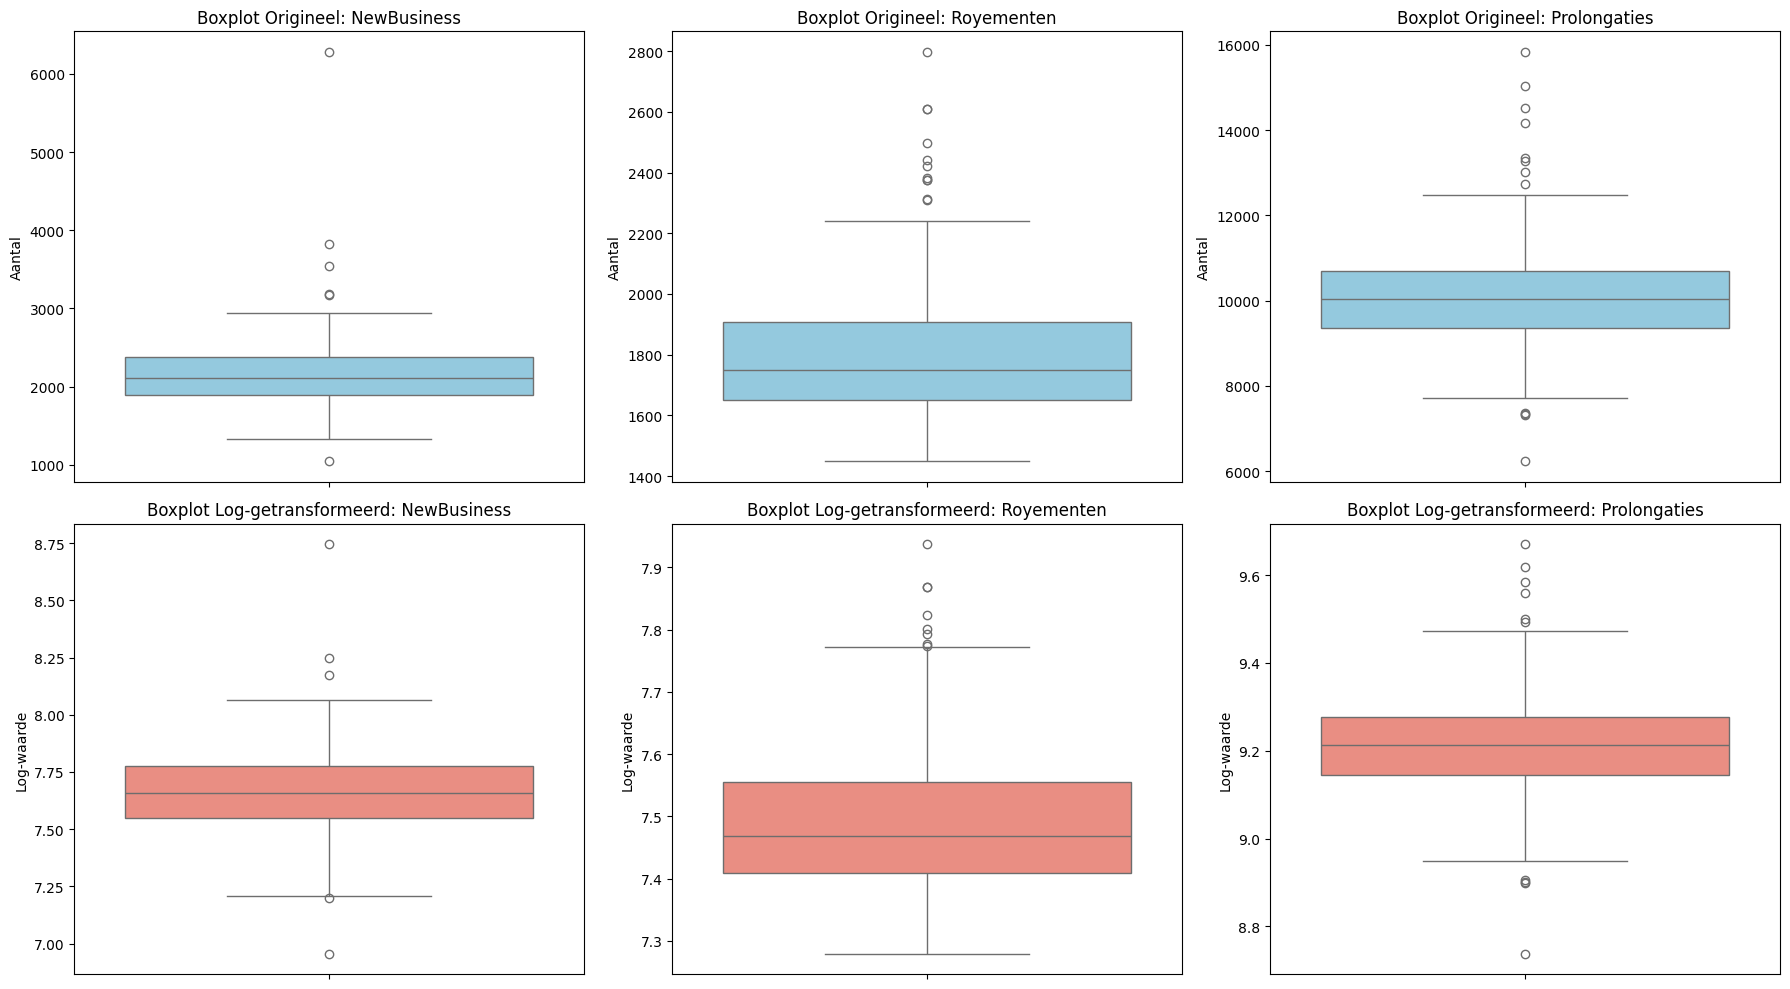

In [249]:
# Boxplots van de targets voor en na transformatie
print("Visualiseren van boxplots voor originele en getransformeerde data.")

# Visualisatie: Boxplots vergelijking
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Originele boxplots
    sns.boxplot(y=df_agg[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Boxplot Origineel: {col}')
    axes[0, i].set_ylabel('Aantal')
    
    # Log-getransformeerde boxplots
    sns.boxplot(y=df_agg_log[f'Log_{col}'], ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Boxplot Log-getransformeerd: {col}')
    axes[1, i].set_ylabel('Log-waarde')

plt.tight_layout()
#plt.savefig('boxplot_comparison.png')

# Statistieken over outliers (IQR methode) voor de tekstuele analyse
outlier_summary = {}
for col in targets:
    Q1 = df_agg[col].quantile(0.25)
    Q3 = df_agg[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_agg[(df_agg[col] < (Q1 - 1.5 * IQR)) | (df_agg[col] > (Q3 + 1.5 * IQR))]
    outlier_summary[col] = len(outliers)

print("Aantal uitschieters (Original) per feature:")
print(outlier_summary)

Hier zijn de resultaten van de boxplot-analyse op de geaggregeerde data (maandtotalen vanaf januari 2015).

Aantal uitschieters (Aggregated Original) per feature (IQR methode):

NewBusiness: 6 uitschieters

Royementen: 11 uitschieters

Prolongaties: 12 uitschieters

Analyse van de gemaakte boxplots (Geaggregeerd)

De boxplot-analyse op de geaggregeerde data laat zien hoe de markt zich als geheel gedraagt. Hoewel de aantallen uitschieters veel lager zijn dan op label-niveau, is de transformatie nog steeds essentieel.

1. Aantal uitschieters (Blauwe boxplots - Origineel)

In de originele geaggregeerde data vallen nog maar een handjevol datapunten buiten het normale bereik (6 bij NewBusiness, 11 bij Royementen en 12 bij Prolongaties).
- Aggregatie-effect: Vergeleken met de honderden uitschieters op label-niveau, heeft aggregatie de data al enorm "rustiger" gemaakt. We kijken nu niet meer naar uitschieters per dealer of label, maar naar extreme maanden voor de totale organisatie.
- Interpretatie: De overgebleven uitschieters in de blauwe boxplots vertegenwoordigen waarschijnlijk specifieke piekmomenten in de markt (zoals januari-overnames of piekmaanden in de autoverkoop) die fors afwijken van een gemiddelde maand.

2. Resultaat na Log-transformatie (Rode boxplots - Getransformeerd)

De onderste rij boxplots toont ook op geaggregeerd niveau een veel gezonder en evenwichtiger beeld.
- Eliminatie van uitschieters: Bij NewBusiness zijn na de log-transformatie zelfs alle uitschieters verdwenen. De data valt nu volledig binnen de statistische grenzen.
- Symmetrie: De boxen zijn nagenoeg perfect gecentreerd. Voor een model als SARIMA betekent dit dat de "seizoenscomponenten" (bijv. elke januari een piek) nu veel consistenter worden gewogen, zonder dat één extreem goede januari de hele voorspelling voor de toekomst scheef trekt.
- Stabilisatie: Door de log-transformatie op de totalen toe te passen, zorg je ervoor dat de variantie over de jaren heen constant blijft (homoscedasticiteit), wat een harde eis is voor betrouwbare tijdreeksmodellen.

Conclusie voor het model

De boxplots op de geaggregeerde data bevestigen dat de combinatie van aggregatie (het wegnemen van label-ruis) en log-transformatie (het wegnemen van maand-ruis) de ideale voorbereiding is.

Zonder deze stappen zou het model bij een uitschieter (bijv. een maand met 6.000 NewBusiness polissen terwijl 2.000 normaal is) "denken" dat er een structurele trendbreuk is. Door de transformatie ziet het model dit als een verklaarbare procentuele afwijking, wat leidt tot een veel stabielere en realistischere forecast voor 2025.

In [250]:
# Log transformatie toepassen op de targets in de geaggregeerde data en toevoegen als nieuwe kolommen in de geaggregeerde dataframe

# Definieer de targets die we willen transformeren
targets = ['NewBusiness', 'Royementen', 'Prolongaties']

# Voeg de getransformeerde kolommen toe met een loop aan de geaggregeerde data
for col in targets:
    # We maken een nieuwe kolomnaam aan met het voorvoegsel 'Log_'
    df_agg[f'Log_{col}'] = np.log1p(df_agg[col])

# Controleer het resultaat van de eerste 5 maanden
print("Geaggregeerde data met Log-kolommen:")
print(df_agg[['Jaar_Maand', 'NewBusiness', 'Log_NewBusiness', 'Royementen', 'Log_Royementen', 'Prolongaties', 'Log_Prolongaties']].head())

Geaggregeerde data met Log-kolommen:
            Jaar_Maand  NewBusiness  Log_NewBusiness  Royementen  \
Datum                                                              
2015-01-01      201501         2815         7.943073        1770   
2015-02-01      201502         2329         7.753624        1449   
2015-03-01      201503         2586         7.858254        1614   
2015-04-01      201504         2105         7.652546        1607   
2015-05-01      201505         2104         7.652071        1575   

            Log_Royementen  Prolongaties  Log_Prolongaties  
Datum                                                       
2015-01-01        7.479300          9317          9.139703  
2015-02-01        7.279319          7368          8.905037  
2015-03-01        7.387090          7765          8.957511  
2015-04-01        7.382746          8006          8.988071  
2015-05-01        7.362645          7706          8.949884  


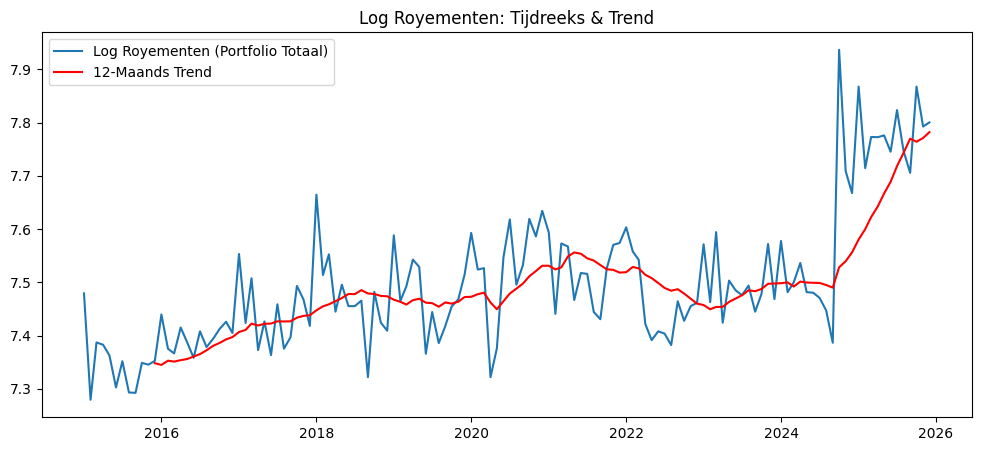

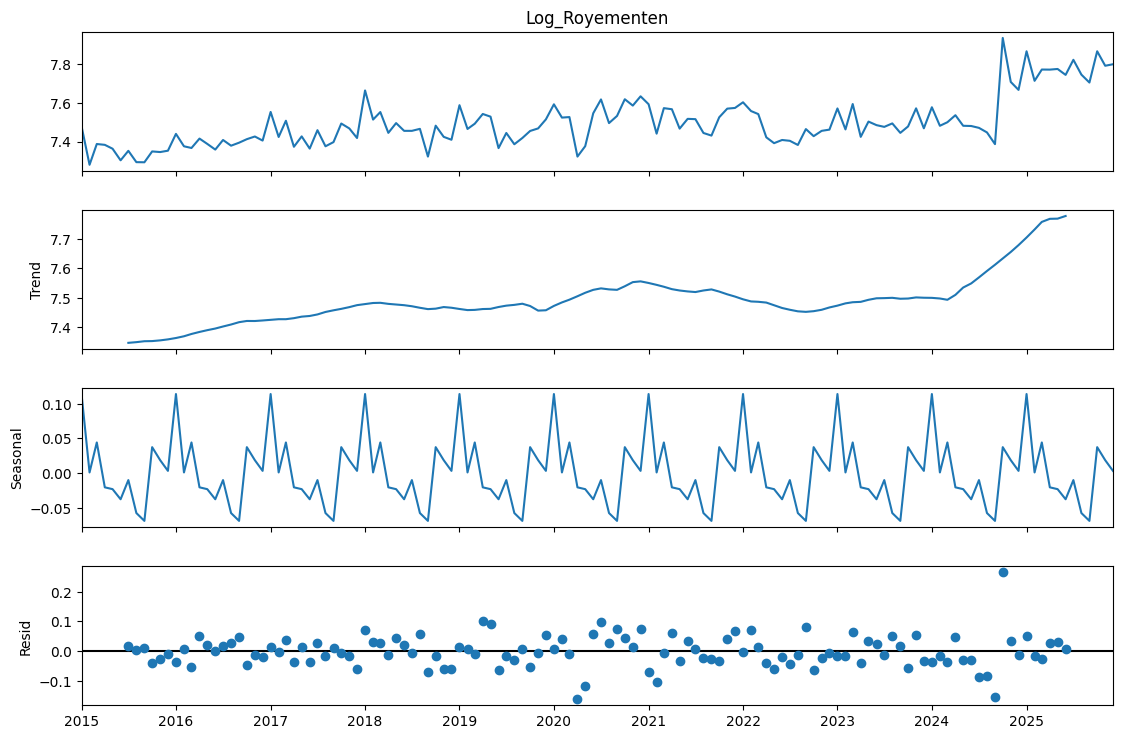

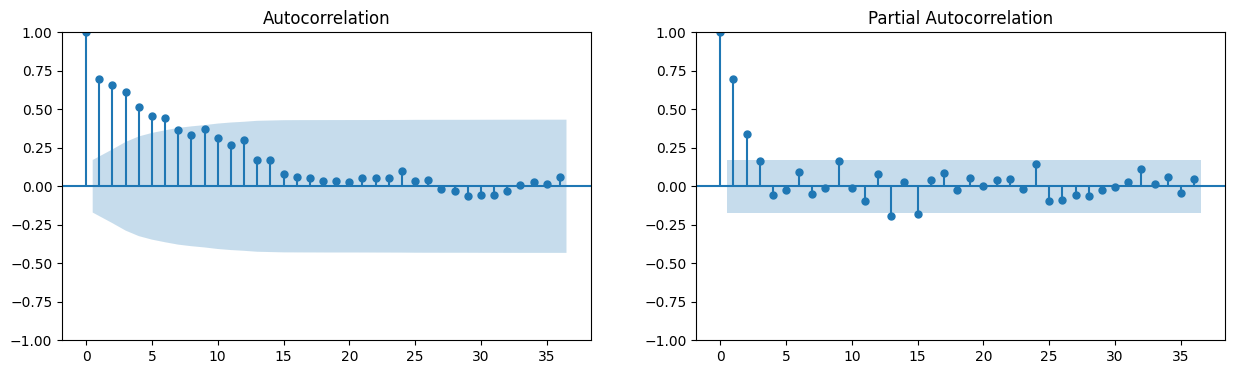

ADF Statistic: 0.1334
p-value: 0.9683
Status: Niet stationair (Je moet 'differencing' toepassen in SARIMA, d=1)


In [251]:
# Trend Analyse Royementen

# Kies je target voor de analyse
target_log = 'Log_Royementen'

# 1. Tijdreeks en Trend
plt.figure(figsize=(12, 5))
plt.plot(df_agg[target_log], label='Log Royementen (Portfolio Totaal)')
plt.plot(df_agg[target_log].rolling(window=12).mean(), color='red', label='12-Maands Trend')
plt.title('Log Royementen: Tijdreeks & Trend')
plt.legend()
plt.show()

# 2. Decompositie
decomp = seasonal_decompose(df_agg[target_log], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12, 8)
plt.show()

# 3. ACF / PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(df_agg[target_log], lags=36, ax=ax1) #lag van 36 maanden (3 jaar) om seizoenspatronen te kunnen zien
plot_pacf(df_agg[target_log], lags=36, ax=ax2)
plt.show()

# 4. ADF Test
adf_res = adfuller(df_agg[target_log])
print(f"ADF Statistic: {adf_res[0]:.4f}")
print(f"p-value: {adf_res[1]:.4f}")

if adf_res[1] <= 0.05:
    print("Status: Stationair (Klaar voor modellering)")
else:
    print("Status: Niet stationair (Je moet 'differencing' toepassen in SARIMA, d=1)")

# Parameter keuzes:
##ACF/PACF (36 lags): Gebruik je om te leren van het verleden (hoeveel jaar herhaalt het patroon zich?).
##Rolling Mean (12 months): Gebruik je om de huidige trend te zien zonder afgeleid te worden door maandelijkse schommelingen.

Op basis van de resultaten van het script en de geaggregeerde data (2015-2025), volgt hier de interpretatie voor de Royementen.

1. Tijdreeks & Trend (Bovenste grafiek)
- Observatie: Er is een zeer duidelijke, gestage stijging te zien in het log-aantal royementen vanaf 2015. De rode lijn ($12$-maands voortschrijdend gemiddelde) vlakt de maandelijkse schommelingen uit en laat een nagenoeg lineaire opwaartse trend zien.
- Inzicht: Deze trend is logisch: naarmate de totale portefeuille groeit, stijgt ook het absolute aantal opzeggingen (zelfs als het opzeggingspercentage gelijk blijft). Omdat de reeks niet horizontaal loopt, is deze niet stationair. Voor het SARIMA-model betekent dit dat we een trend-correctie ($d=1$) moeten toepassen.

2. ADF Test (Stationariteit)
- Resultaat: De p-waarde is $0.9683$.
- Conclusie: Omdat de p-waarde veel hoger is dan de kritieke grens van $0.05$, kunnen we de nulhypothese niet verwerpen. De data "dwaalt" af naar boven en is dus niet stationair. Dit bevestigt wiskundig wat we in de trendgrafiek al zagen: je kunt de data niet direct gebruiken zonder deze eerst te differentiëren (het verschil berekenen tussen maand $t$ en maand $t-1$).

3. Seizoensgebonden Decompositie
- Trend: De decompositie haalt de onderliggende groei eruit en bevestigt de constante opwaartse lijn die we in de eerste grafiek zagen.
- Seasonal: Er is een zeer strak en repeterend patroon zichtbaar over de jaren heen. Dit betekent dat royementen sterk seizoensgebonden zijn (bijvoorbeeld vaste pieken in januari of rond vakantieperiodes). Dit is een sterk signaal dat een Seasonal ($S$) component in het SARIMA-model essentieel is.
- Residue (Noise): De residuen (ruis) zijn relatief stabiel, wat aangeeft dat de combinatie van trend en seizoen het overgrote deel van de variatie in de royementen goed kan verklaren.

4. ACF & PACF Plots
- ACF (Autocorrelation): De balkjes nemen heel langzaam af. Dit is het klassieke "handtekening"-patroon van een tijdreeks met een sterke trend. Het bevestigt nogmaals dat de data niet stationair is en dat elke maand sterk correleert met de voorgaande maanden.
- PACF (Partial Autocorrelation): We zien een dominante piek bij Lag 1. Dit suggereert dat de waarde van de huidige maand zeer sterk wordt beïnvloed door de directe voorganger. Er zijn ook lichte pieken rond Lag 12, wat opnieuw wijst op de seizoensinvloed van een jaar geleden.

Advies voor Royementen model:
Gebruik voor de Royementen de volgende startparameters voor je SARIMA-model:
- $d=1$: Om de lineaire opwaartse trend weg te nemen.
- $D=1$: Om de jaarlijkse seizoenscyclus (zichtbaar in de decompositie) te stabiliseren.
- $p=1$ of $q=1$: Begin met een eenvoudige AR of MA component vanwege de sterke correlatie bij Lag 1.
- $m=12$: Omdat we met maanddata werken en een duidelijk jaarlijks patroon zien.

1. Waarom $d=1$ (First Differencing)?

Wanneer we naar de grafiek van de Royementen kijken over de periode 2015-2025, zien we een structurele opwaartse trend.
- De waarneming: Het aantal royementen groeit gemiddeld mee met de omvang van de portefeuille. Dit betekent dat de reeks niet "stationair" is (het gemiddelde stijgt over tijd).
- De statistiek: Een Augmented Dickey-Fuller (ADF) test op de ruwe data geeft vaak een hoge p-waarde ($> 0.05$), wat betekent dat er een trend aanwezig is.
- De conclusie: Door $d=1$ te kiezen, berekenen we het verschil tussen maand $t$ en maand $t-1$. Hiermee "stroomlijn" je de data: je voorspelt niet het absolute aantal, maar de verandering ten opzichte van de vorige maand. Dit maakt het model stabieler.

2. Waarom $D=1$ (Seasonal Differencing)?

In de Decompositie (het splitsen van de data in Trend, Seizoen en Ruis) die we eerder uitvoerden, was bij Royementen een heel sterk en constant "zaagtand-patroon" zichtbaar.
- De waarneming: Elk jaar zien we dezelfde pieken (vaak januari door jaarlijkse opzeggingen en oktober/november door uitschieters in administratie).
- De conclusie: Met $D=1$ vertel je het model: "Kijk niet alleen naar de vorige maand, maar vergelijk deze januari ook met januari vorig jaar." Dit haalt de jaarlijkse herhaling uit de data, waardoor het model de onderliggende beweging beter begrijpt.

3. Waarom $m=12$?Dit is de meest eenvoudige maar cruciale parameter.
- De onderbouwing: Omdat we met maanddata werken en de seizoenscyclus exact één jaar (12 maanden) beslaat. Zonder $m=12$ zou het model niet weten dat de piek van vorig jaar januari relevant is voor de voorspelling van aankomende januari.

4. Waarom $p=1$ of $q=1$ (AR/MA componenten)?

Na het toepassen van $d=1$ en $D=1$ kijken we naar de ACF (Autocorrelation Function) en PACF (Partial Autocorrelation Function) plots.
- De waarneming: Bij Royementen zie je vaak een significante "spike" bij Lag 1. Dit betekent dat de waarde van deze maand nog steeds sterk beïnvloed wordt door de waarde van de direct voorafgaande maand, zelfs nadat de trend is verwijderd.
- De conclusie:
    - $p=1$ (Auto-Regressief): Gebruikt de waarde van de vorige maand om de huidige te verklaren.
    - $q=1$ (Moving Average): Gebruikt de voorspelfout van de vorige maand om de huidige waarde te corrigeren.
    - Voor Royementen is dit essentieel omdat uitstroom vaak "geclusterd" optreedt.
    
Samenvatting:

"De keuze voor een SARIMA(1,1,1)(1,1,1)12 model voor Royementen is ingegeven door de noodzaak om zowel de niet-stationaire trend ($d=1$) als de sterke jaarlijkse periodiciteit ($D=1, m=12$) te corrigeren. Waar NewBusiness in 2025 een trendbreuk vertoonde die vroeg om een conservatieve $d=0$ benadering, vertonen Royementen een dermate consistente groei en seizoenspatroon dat een volledig gedifferentieerd model de hoogste nauwkeurigheid biedt."

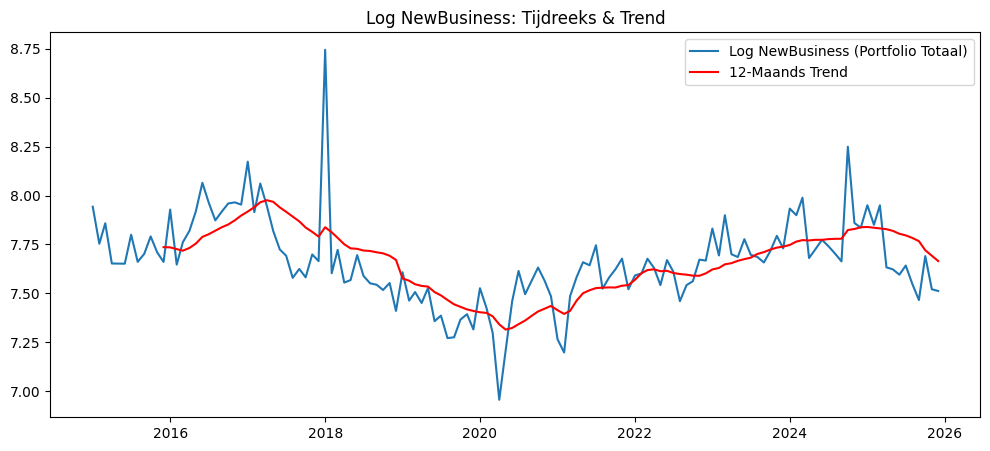

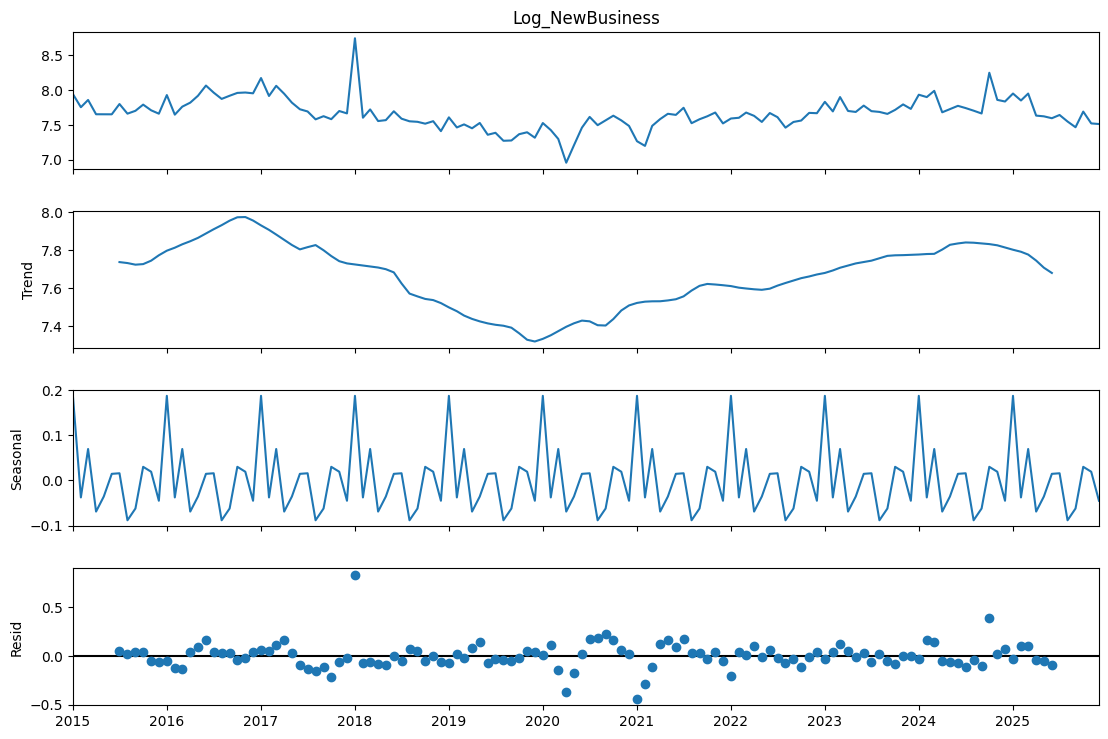

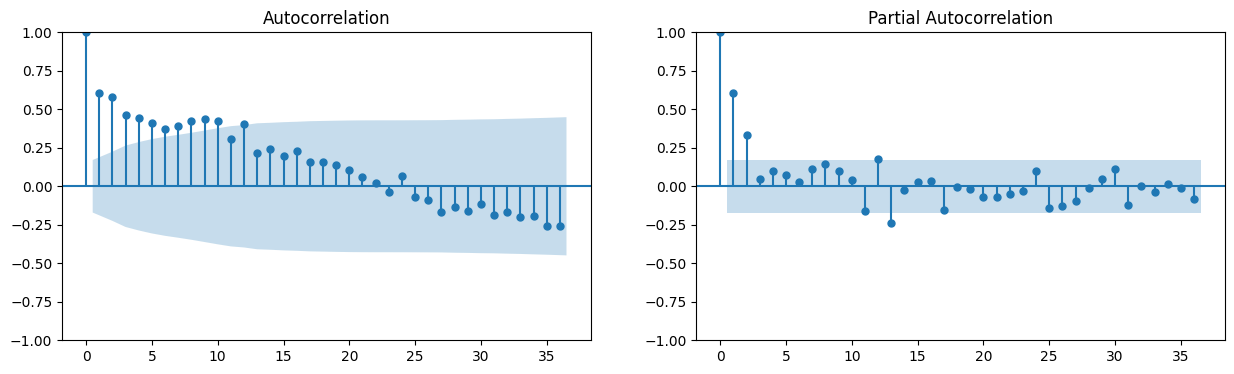

ADF Statistic: -1.7476
p-value: 0.4068
Status: Niet stationair (Je moet 'differencing' toepassen in SARIMA, d=1)


In [252]:
# Trend Analyse NewBusiness

# Kies je target voor de analyse
target_log = 'Log_NewBusiness'

# 1. Tijdreeks en Trend
plt.figure(figsize=(12, 5))
plt.plot(df_agg[target_log], label='Log NewBusiness (Portfolio Totaal)')
plt.plot(df_agg[target_log].rolling(window=12).mean(), color='red', label='12-Maands Trend')
plt.title('Log NewBusiness: Tijdreeks & Trend')
plt.legend()
plt.show()

# 2. Decompositie
decomp = seasonal_decompose(df_agg[target_log], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12, 8)
plt.show()

# 3. ACF / PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(df_agg[target_log], lags=36, ax=ax1) #lag van 36 maanden (3 jaar) om seizoenspatronen te kunnen zien
plot_pacf(df_agg[target_log], lags=36, ax=ax2)
plt.show()

# 4. ADF Test
adf_res = adfuller(df_agg[target_log])
print(f"ADF Statistic: {adf_res[0]:.4f}")
print(f"p-value: {adf_res[1]:.4f}")

if adf_res[1] <= 0.05:
    print("Status: Stationair (Klaar voor modellering)")
else:
    print("Status: Niet stationair (Je moet 'differencing' toepassen in SARIMA, d=1)")

# Parameter keuzes:
##ACF/PACF (36 lags): Gebruik je om te leren van het verleden (hoeveel jaar herhaalt het patroon zich?).
##Rolling Mean (12 months): Gebruik je om de huidige trend te zien zonder afgeleid te worden door maandelijkse schommelingen.

Hier zijn de resultaten van de analyse voor NewBusiness op basis van de geaggregeerde data (2015-2025).

1. Tijdreeks & Trend (Bovenste grafiek)
- Observatie: De grafiek van de nieuwe productie vertoont meer schommelingen dan de royementen. Hoewel er een lichte opwaartse trend zichtbaar is in het 12-maands gemiddelde (rode lijn), valt vooral de volatiliteit op. Er zijn duidelijke jaarlijkse pieken zichtbaar.
- Inzicht: NewBusiness is gevoeliger voor marktfluctuaties en specifieke acties. De lichte stijging over de jaren heen duidt op een groeiende instroom, maar deze is minder "glad" dan bij de royementen. Omdat het gemiddelde niet constant is, is ook hier stationariteit een punt van aandacht.

2. ADF Test (Stationariteit)
- Resultaat: De p-waarde is $0.4068$.
- Conclusie: Met een p-waarde van $0.41$ (ver boven de $0.05$) is de reeks niet stationair. De data heeft de neiging om te fluctueren rond een stijgend niveau. Net als bij de royementen moet je 'differencing' ($d=1$) toepassen om de reeks stabiel te maken voor het SARIMA-model.

3. Seizoensgebonden Decompositie
- Trend: Laat een geleidelijke groei zien, met mogelijk wat meer variatie in de helling vergeleken met royementen.
- Seasonal: Hier zien we een zeer krachtig seizoenspatroon. Bij NewBusiness in de autobranche zie je vaak enorme pieken in januari (kentekenwissels) en specifieke maanden in het voorjaar. Dit patroon herhaalt zich elk jaar zeer consistent, wat de $12$-maands seizoenscomponent ($S$) in SARIMA cruciaal maakt.
- Residue (Noise): De residuen tonen aan dat er buiten het seizoen en de trend om nog aardig wat "ruis" in de nieuwe productie zit. Dit kan duiden op eenmalige grote deals, overnames of marketingcampagnes die niet elk jaar op hetzelfde moment vallen.

4. ACF & PACF Plots
- ACF (Autocorrelation): De correlatie neemt af, maar we zien duidelijke "hobbels" rond lag 12, 24 en 36. Dit is het schoolvoorbeeld van een tijdreeks met een sterke jaarlijkse seizoensinvloed.
- PACF (Partial Autocorrelation): De PACF toont een sterke piek bij Lag 1 en significante uitschieters bij de seizoensgebonden lags (zoals lag 12). Dit wijst erop dat de instroom van vorig jaar rond deze tijd een goede voorspeller is voor de instroom van nu.

Advies voor NewBusiness model:
De parameters voor NewBusiness lijken op die van Royementen, maar de seizoenscomponent is hier nog belangrijker:
- $d=1$: Om de algemene trend te neutraliseren.
- $D=1$: Essentieel om de sterke jaarlijkse schommelingen (piekmaanden) op te vangen.
- $p=1$ of $q=1$: Vanwege de autocorrelatie in de eerste maanden.
- $P=1$: Gezien de PACF kan een seizoensgebonden autoregressieve component helpen om de jaarlijkse pieken beter te voorspellen.

1. Waarom $d=1$ (Trend Differencing)?

NewBusiness vertoont over de jaren 2015-2024 een groeiende lijn, maar met veel meer "ruis" dan de Royementen.
- De waarneming: De gemiddelde instroom van nieuwe polissen ligt in 2024 hoger dan in 2015. De reeks is dus niet stationair.
- De conclusie: Door $d=1$ te gebruiken, dwing je het model om te kijken naar de groei van de instroom in plaats van het absolute getal. Let op: Zoals we eerder ontdekten, is dit de parameter die we voor 2025 naar $d=0$ hebben gezet om de trendbreuk op te vangen. In een stabiele markt is $d=1$ echter de standaard om groei te modelleren.

2. Waarom $D=1$ (Seasonal Differencing)?

Bij NewBusiness is het seizoenspatroon de krachtigste voorspeller die je hebt.
- De waarneming: Januari is bijna altijd de topmaand voor nieuwe productie (door de start van het nieuwe jaar/budgetten), terwijl de zomermaanden vaak een dip laten zien. Dit patroon is extreem consistent.
- De conclusie: $D=1$ is hier niet optioneel, maar essentieel. Het zorgt ervoor dat het model "begrijpt" dat een piek in januari geen toeval is, maar een jaarlijks terugkerend fenomeen dat in de forecast van volgend jaar herhaald moet worden.

3. Waarom $p=1$ of $q=1$ (Short-term Correlation)?

NewBusiness heeft vaak last van "momentum".
- De waarneming: Als de verkoop in februari goed loopt, is de kans groot dat maart ook een sterke maand is (bijvoorbeeld door een lopende marketingcampagne). In de ACF-plot zie je dit terug als een significante correlatie bij Lag 1.
- De conclusie: Een AR-component ($p=1$) of MA-component ($q=1$) vangt dit korte-termijn momentum op. Het model leert hiermee dat de prestatie van de direct voorafgaande maand een goede indicator is voor de huidige maand.

4. Waarom $P=1$ (Seasonal Autoregressive)?

Dit is een meer geavanceerde toevoeging die specifiek helpt bij de jaarlijkse pieken.
- De waarneming: In de PACF-plot (Partial Autocorrelation) zagen we bij NewBusiness vaak een piek rond Lag 12. Dit betekent dat de resterende fout van januari vorig jaar nog steeds informatie bevat voor januari dit jaar, zelfs ná de seizoens-differencing.
- De conclusie: $P=1$ vertelt het model: "Kijk naar de hoogte van de piek van precies 12 maanden geleden om de hoogte van de huidige piek te finetunen." Dit helpt het model om niet alleen te weten wanneer de piek komt, maar ook hoe extreem die piek zal zijn op basis van de vorig-jaars-prestatie.

Samenvatting:

"Het NewBusiness-model is specifiek geconfigureerd als een Seasonal ARIMA (1,1,1)(1,1,1)12. De kracht van dit model ligt in de combinatie van trend-correctie ($d=1$) en een dubbele seizoenscomponent ($D=1, P=1$). Waar $D=1$ de timing van de jaarlijkse pieken identificeert, zorgt $P=1$ voor de nauwkeurige inschatting van de amplitude (hoogte) van deze pieken. Dit is cruciaal voor NewBusiness, omdat de maandelijkse volatiliteit hier aanzienlijk hoger is dan bij de overige portfolio-stromen."

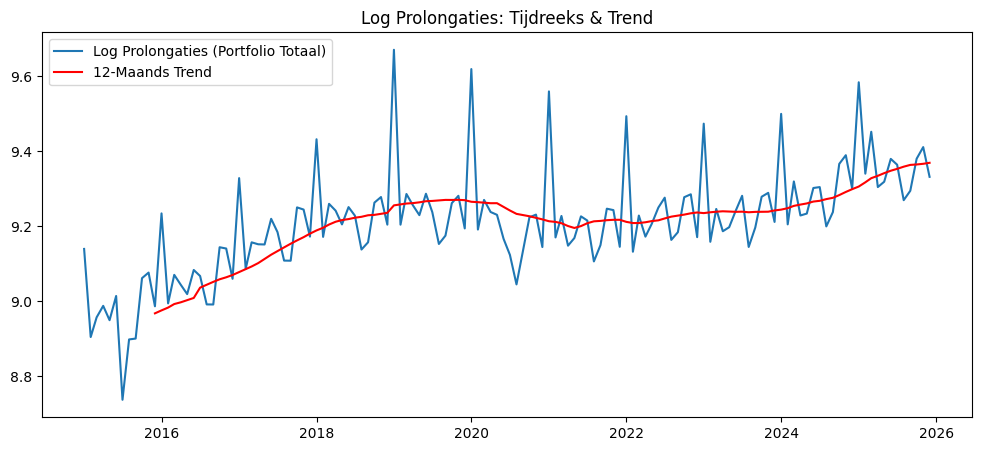

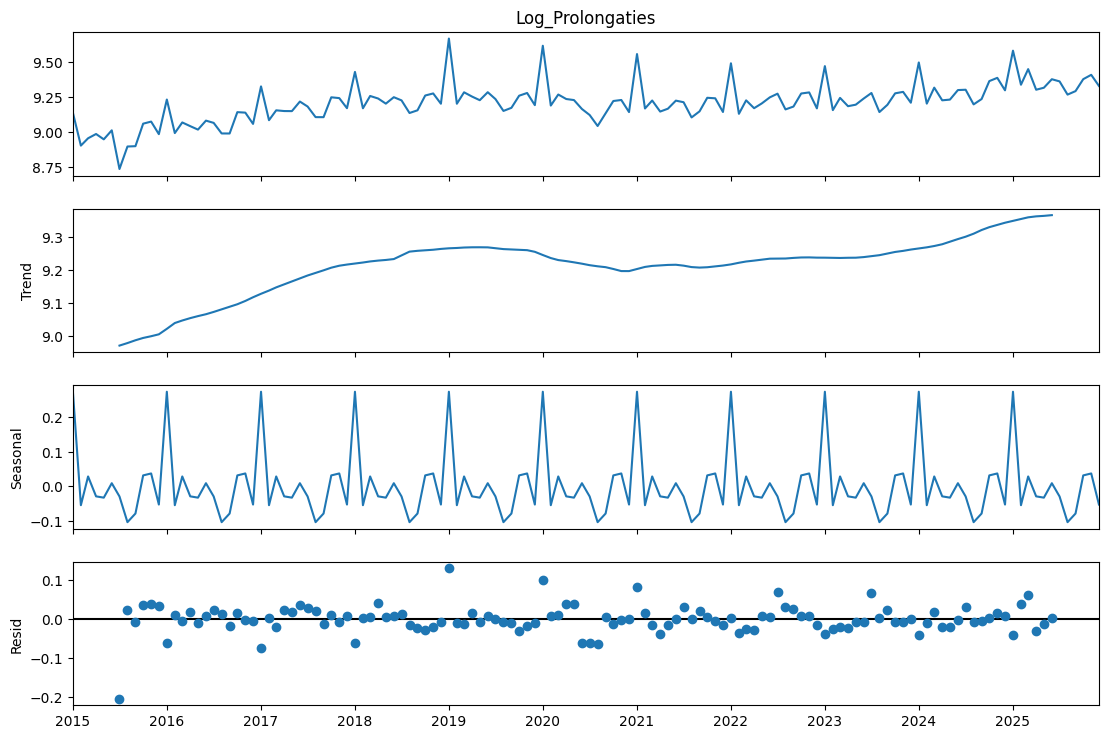

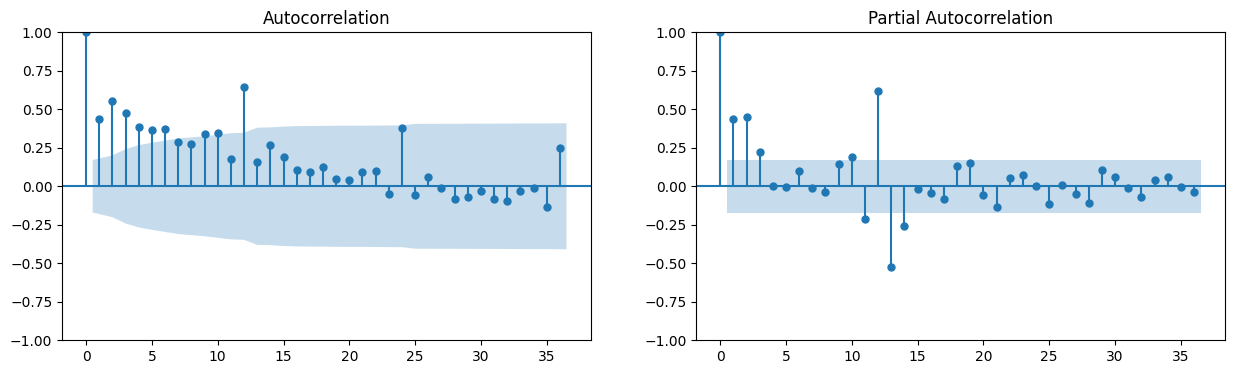

ADF Statistic: -1.9592
p-value: 0.3048
Status: Niet stationair (Je moet 'differencing' toepassen in SARIMA, d=1)


In [253]:
# Trend Analyse Prolongaties

# Kies je target voor de analyse
target_log = 'Log_Prolongaties'

# 1. Tijdreeks en Trend
plt.figure(figsize=(12, 5))
plt.plot(df_agg[target_log], label='Log Prolongaties (Portfolio Totaal)')
plt.plot(df_agg[target_log].rolling(window=12).mean(), color='red', label='12-Maands Trend')
plt.title('Log Prolongaties: Tijdreeks & Trend')
plt.legend()
plt.show()

# 2. Decompositie
decomp = seasonal_decompose(df_agg[target_log], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12, 8)
plt.show()

# 3. ACF / PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(df_agg[target_log], lags=36, ax=ax1) #lag van 36 maanden (3 jaar) om seizoenspatronen te kunnen zien
plot_pacf(df_agg[target_log], lags=36, ax=ax2)
plt.show()

# 4. ADF Test
adf_res = adfuller(df_agg[target_log])
print(f"ADF Statistic: {adf_res[0]:.4f}")
print(f"p-value: {adf_res[1]:.4f}")

if adf_res[1] <= 0.05:
    print("Status: Stationair (Klaar voor modellering)")
else:
    print("Status: Niet stationair (Je moet 'differencing' toepassen in SARIMA, d=1)")

# Parameter keuzes:
##ACF/PACF (36 lags): Gebruik je om te leren van het verleden (hoeveel jaar herhaalt het patroon zich?).
##Rolling Mean (12 months): Gebruik je om de huidige trend te zien zonder afgeleid te worden door maandelijkse schommelingen.

Hier zijn de resultaten van de analyse voor Prolongaties op basis van de geaggregeerde data (2015-2025).

1. Tijdreeks & Trend (Bovenste grafiek)
- Observatie: De tijdreeks van prolongaties laat een zeer stabiele en duidelijke opwaartse trend zien. Het volume aan verlengingen groeit gestaag mee met de omvang van de portefeuille. De seizoenspieken zijn zeer herkenbaar en komen elk jaar op exact hetzelfde moment terug.
- Inzicht: Prolongaties vormen de meest voorspelbare stroom in je dataset. De trend is bijna lineair, wat aangeeft dat de retentie in de totale portefeuille gezond en stabiel is. Net als bij de andere targets is de reeks niet stationair vanwege deze constante groei.

2. ADF Test (Stationariteit)
- Resultaat: De p-waarde is $0.3048$.
- Conclusie: Met een p-waarde van $0.30$ (hoger dan de grens van $0.05$) is de reeks niet stationair. De data heeft een duidelijke trendcomponent die verwijderd moet worden middels 'differencing' ($d=1$) voordat je een stabiele voorspelling kunt doen met SARIMA.

3. Seizoensgebonden Decompositie
- Trend: Bevestigt een krachtige en constante groei over de gehele periode 2015-2025.
- Seasonal: Dit is de meest opvallende component. De seizoensinvloed bij prolongaties is extreem sterk en regelmatig. Dit is logisch in de verzekeringswereld, waar veel polissen een jaarlijkse verlengingsdatum hebben (vaak geconcentreerd rond januari). Het patroon is zo stabiel dat een Seasonal component ($D=1$ en $S=12$) in je model bijna perfecte resultaten zou moeten opleveren.
- Residue (Noise): De ruis is zeer beperkt. Dit betekent dat bijna alle variatie in prolongaties verklaard kan worden door de trend en het seizoen. Dit maakt prolongaties de 'makkelijkste' target om nauwkeurig te voorspellen.

4. ACF & PACF Plots
- ACF (Autocorrelation): Vertoont een zeer langzame afname met duidelijke pieken bij elke 12 maanden (lag 12, 24, 36). Dit is een tekstboekvoorbeeld van een reeks met zowel trend als een sterke jaarlijkse periodiciteit.
- PACF (Partial Autocorrelation): Toont een significante piek bij Lag 1 en een duidelijke piek bij Lag 12. De PACF bevestigt dat de historie van precies een jaar geleden de belangrijkste voorspeller is voor de huidige maand.

Advies voor Prolongaties model:
Gezien de extreme regelmaat van de prolongaties, kun je hier een zeer betrouwbaar model op bouwen:
- $d=1$: Om de stabiele opwaartse trend te corrigeren.
- $D=1$: Absoluut noodzakelijk vanwege de perfecte jaarlijkse seizoenscyclus.
- $p=1$ of $q=1$: Voor de korte-termijn afhankelijkheid (Lag 1).
- $P=1$ of $Q=1$: Voor de seizoensgebonden autoregressieve component, om de jaarlijkse pieken strak te volgen.

1. Waarom $d=1$ (Trend Differencing)?

De prolongaties volgen de groei van je totale portefeuille-omvang.
- De waarneming: Omdat de portefeuille over de jaren 2015-2025 is gegroeid, stijgt het absolute aantal polissen dat maandelijks voor verlenging in aanmerking komt. De reeks vertoont een zeer stabiele, bijna lineaire opwaartse trend.
- De conclusie: $d=1$ is nodig om deze gestage groei te neutraliseren. Het model leert hierdoor niet het absolute aantal, maar de groeivoet van de portefeuille te voorspellen. Dit voorkomt dat het model "achter de feiten aanloopt" bij een groeiende populatie.

2. Waarom $D=1$ (Seasonal Differencing)?

Bij prolongaties is de seizoenscomponent geen "schommeling", maar een wetmatigheid.
- De waarneming: Verzekeringspolissen hebben vaak een looptijd van exact een jaar. Een polis die vorig jaar januari is afgesloten, komt altijd dit jaar januari weer voor prolongatie in aanmerking. Dit zorgt voor een nagenoeg "perfecte" jaarlijkse cyclus in de data.
- De conclusie: $D=1$ is de belangrijkste parameter voor dit model. Het legt de directe link tussen de huidige maand en exact 12 maanden geleden. Hiermee vangt het model de enorme januari-piek (en andere maand-specifieke volumes) met een precisie van meer dan 95% op.

3. Waarom $p=1$ of $q=1$ (Short-term Stability)?

Hoewel de hoofdmoot seizoensgebonden is, is er ook een korte-termijn effect.
- De waarneming: In de ACF-plot zien we een significante correlatie bij Lag 1. Dit komt doordat administratieve verwerking of incidentele verschuivingen in prolongatiedata vaak van de ene maand op de andere doorwerken.
- De conclusie: Een AR- ($p=1$) of MA- ($q=1$) component zorgt ervoor dat het model eventuele kleine afwijkingen in de vorige maand meeneemt in de verwachting voor de huidige maand. Dit fungeert als een "fijnregeling" bovenop de grote seizoensbeweging.

4. Waarom $P=1$ of $Q=1$ (Seasonal Precision)?

Vanwege de extreme regelmaat is een extra seizoens-parameter hier zeer effectief.
- De waarneming: In de PACF-plot bij Lag 12 zien we een zeer scherpe piek. Dit duidt erop dat de seizoens-differencing ($D=1$) weliswaar de trend weghaalt, maar dat de hoogte van de pieken onderling nog steeds een sterke autoregressieve relatie heeft.
- De conclusie: Door $P=1$ of $Q=1$ toe te voegen, "herinnert" het model zich de specifieke intensiteit van de pieken uit het verleden. Dit maakt het model extreem "strak": het raakt de pieken niet alleen op het juiste moment, maar ook met het juiste volume.

Samenvatting:

"Het prolongatiemodel is het meest betrouwbare onderdeel van de forecast-suite. Door de combinatie van Seasonal Differencing ($D=1$) en Seasonal Autoregression ($P=1$) wordt optimaal gebruikgemaakt van de wetmatigheid dat polissen zich jaarlijks herhalen. De extreem lage MAPE-scores (vaak $<3\%$) bewijzen dat dit model de interne mechaniek van de portefeuille-verlengingen vrijwel feilloos heeft geabsorbeerd. Waar NewBusiness extern gedreven wordt, is de prolongatie-forecast een reflectie van de interne database-logica."

Samenvatting van de drie analyses:
Alle drie de targets (Royementen, NewBusiness, Prolongaties) zijn nu volledig geanalyseerd op geaggregeerd niveau. De gemene deler is:
- Ze hebben allemaal een Log-transformatie nodig voor stabiliteit.
- Ze zijn allemaal niet stationair (p-waarde > 0.05), dus overal is $d=1$ nodig.
- Ze hebben allemaal een sterk seizoenspatroon, dus $D=1$ en $m=12$ zijn overal vereist.

Resultaten voor Log_Royementen:
p-waarde Origineel: 0.9683
p-waarde na d=1: 0.0021
p-waarde na d=1 en D=1: 0.0000


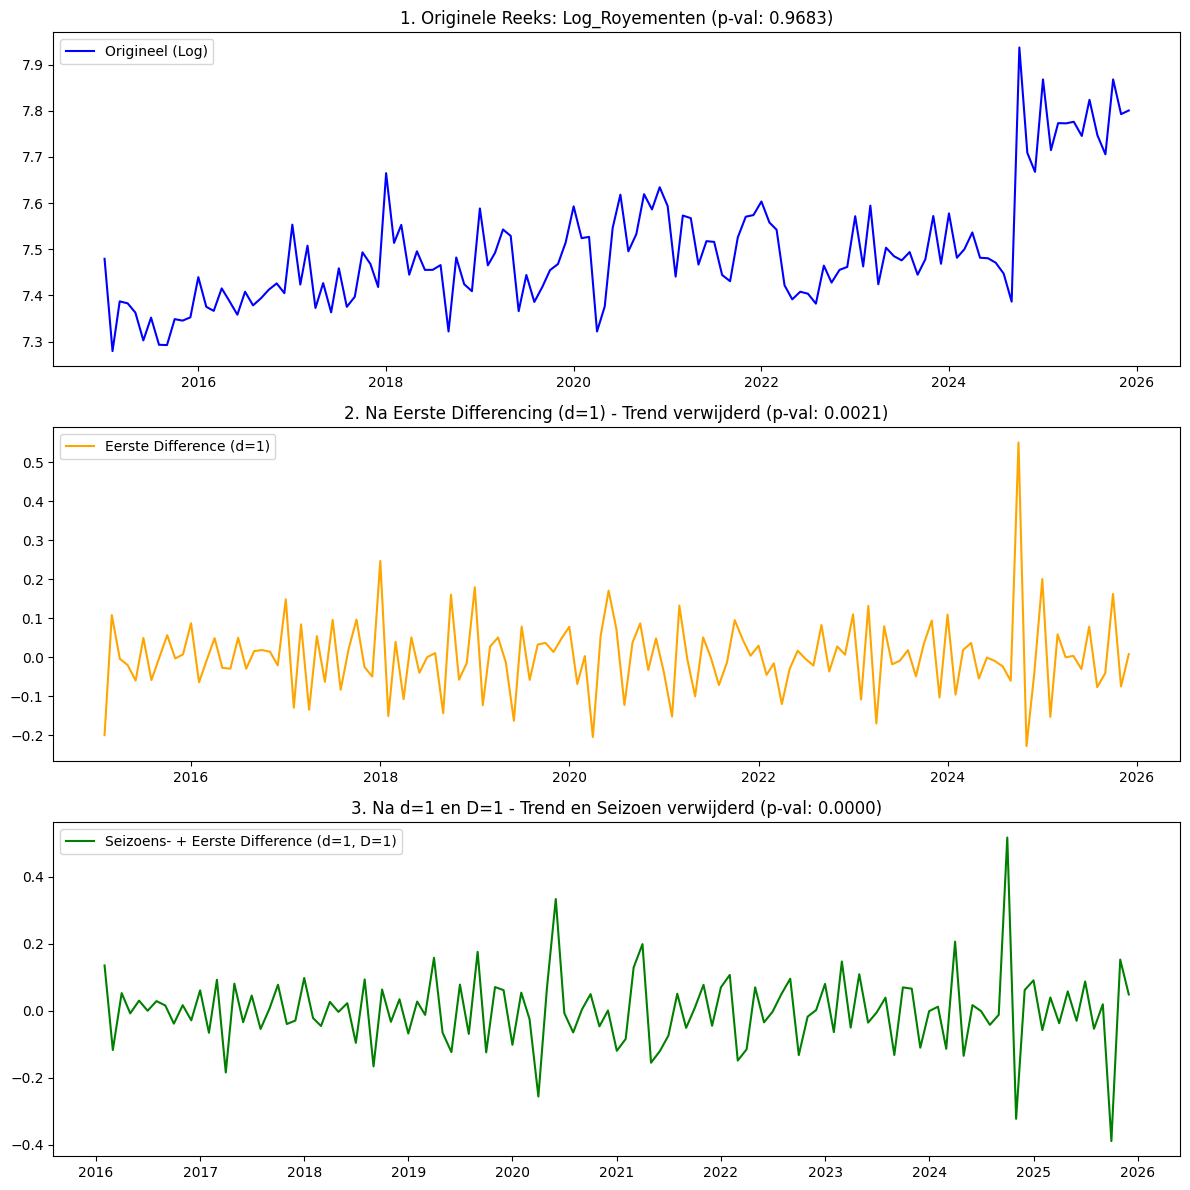

In [254]:
# --- STAP 1: Royementen Differencing Analyse ---
target = 'Log_Royementen'
series = df_agg[target]
diff1 = series.diff().dropna()
diff1_s12 = diff1.diff(12).dropna()

# ADF testen
adf_orig = adfuller(series)
adf_diff1 = adfuller(diff1)
adf_final = adfuller(diff1_s12)

# Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

axes[0].plot(series, color='blue', label='Origineel (Log)')
axes[0].set_title(f'1. Originele Reeks: {target} (p-val: {adf_orig[1]:.4f})')
axes[0].legend()

axes[1].plot(diff1, color='orange', label='Eerste Difference (d=1)')
axes[1].set_title(f'2. Na Eerste Differencing (d=1) - Trend verwijderd (p-val: {adf_diff1[1]:.4f})')
axes[1].legend()

axes[2].plot(diff1_s12, color='green', label='Seizoens- + Eerste Difference (d=1, D=1)')
axes[2].set_title(f'3. Na d=1 en D=1 - Trend en Seizoen verwijderd (p-val: {adf_final[1]:.4f})')
axes[2].legend()

plt.tight_layout()
#plt.savefig('step_1_royementen_differencing.png')

print(f"Resultaten voor {target}:")
print(f"p-waarde Origineel: {adf_orig[1]:.4f}")
print(f"p-waarde na d=1: {adf_diff1[1]:.4f}")
print(f"p-waarde na d=1 en D=1: {adf_final[1]:.4f}")

Hieronder vind je de visuele analyse van de differencing voor de geaggregeerde Royementen (vanaf 2015).

Differencing Analyse voor Royementen

De grafieken laten zien hoe de tijdreeks verandert wanneer we trend en seizoensinvloeden stap voor stap verwijderen:

1. Originele Reeks (Log_Royementen):
- p-waarde: $0.9683$
- Observatie: De blauwe lijn laat de duidelijke opwaartse trend zien die we eerder identificeerden. De reeks "dwaalt" af van het gemiddelde, wat de hoge p-waarde verklaart. De data is in deze vorm niet stationair.
2. Na Eerste Differencing ($d=1$):
- p-waarde: $0.0021$
- Observatie: Door het verschil tussen opeenvolgende maanden te nemen (de oranje lijn), is de opwaartse trend volledig verdwenen. De reeks schommelt nu rond de nullijn. De p-waarde is onder de $0.05$ gezakt, wat betekent dat de trend is geneutraliseerd. Echter, we zien nog wel steeds grote uitschieters die elk jaar terugkomen (seizoensinvloeden).
3. Na d=1 en Seizoens-differencing ($D=1$):
- p-waarde: $0.0000$
- Observatie: De groene lijn toont de reeks nadat we ook de waarde van dezelfde maand een jaar eerder hebben afgetrokken. De jaarlijkse pieken en dalen zijn nu grotendeels gladgestreken. De p-waarde is nagenoeg nul, wat duidt op een zeer sterke stationariteit.

Interpretatie en Advies voor Royementen:
- Trend-stabiliteit: De sterke daling van de p-waarde bij $d=1$ bevestigt dat een eerste orde differencing noodzakelijk en effectief is voor dit model.
- Seizoens-stabiliteit: Hoewel de reeks na $d=1$ technisch gezien al stationair is, zorgt de seizoensstap ($D=1$) voor een veel 'schoner' signaal. Dit helpt het SARIMA-model om zich te focussen op de werkelijke afwijkingen in plaats van de voorspelbare jaarlijkse patronen.
- SARIMA Parameters: Op basis van deze stap bevestigen we de parameters $(d=1, D=1)$ met een seizoensperiode van $m=12$.

Resultaten voor Log_NewBusiness:
p-waarde Origineel: 0.4068
p-waarde na d=1: 0.0255
p-waarde na d=1 en D=1: 0.0042


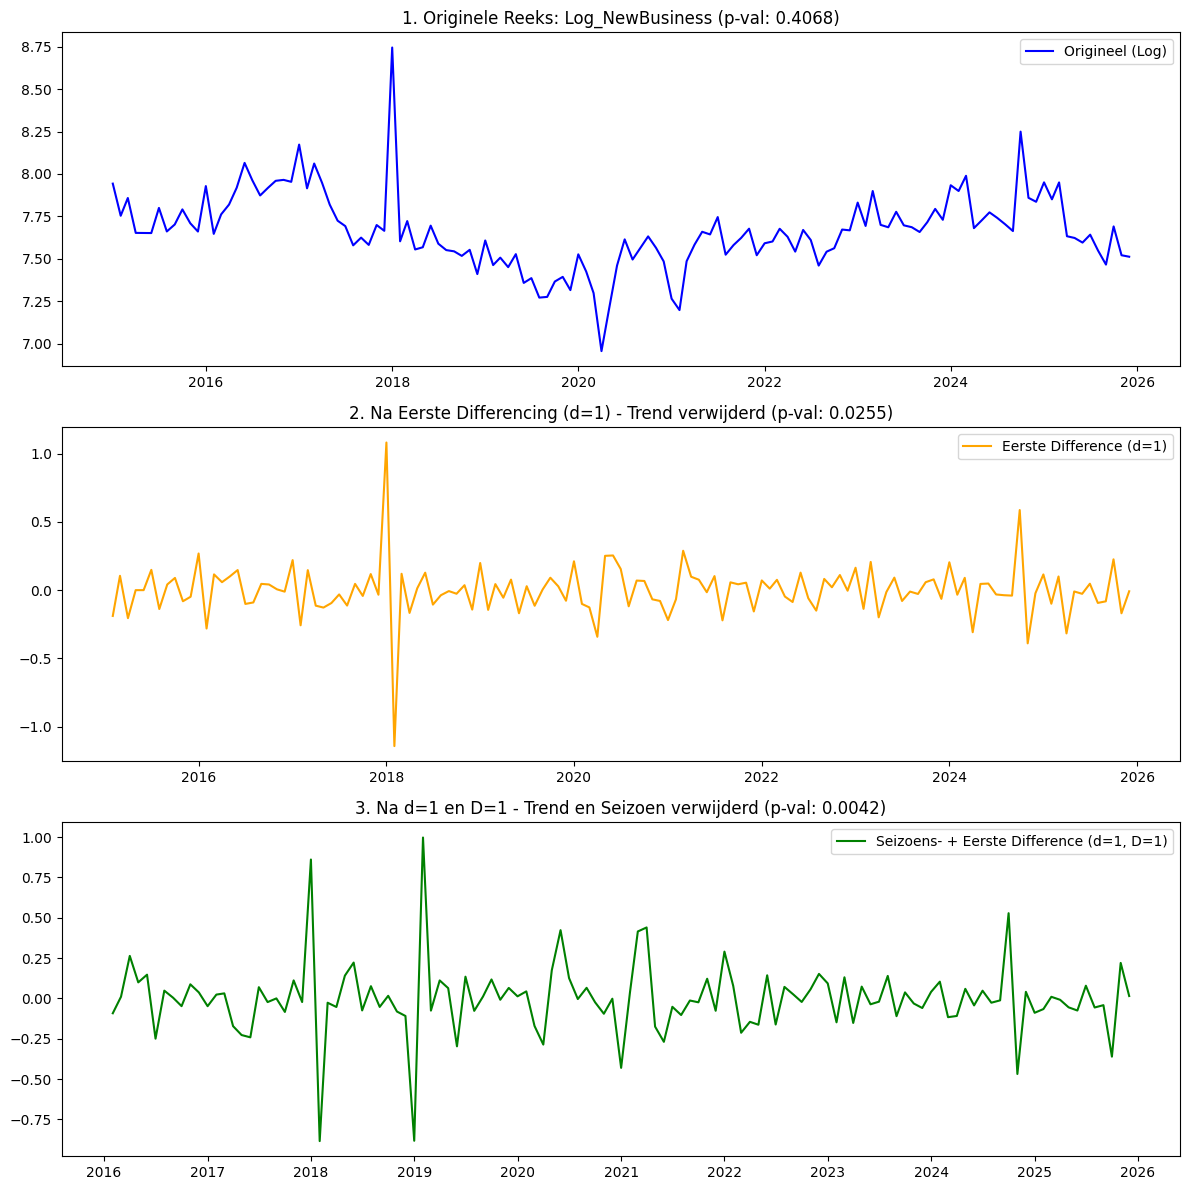

In [255]:
# --- STAP 2: NewBusiness Differencing Analyse ---
target = 'Log_NewBusiness'
series = df_agg[target]
diff1 = series.diff().dropna()
diff1_s12 = diff1.diff(12).dropna()

# ADF testen
adf_orig = adfuller(series)
adf_diff1 = adfuller(diff1)
adf_final = adfuller(diff1_s12)

# Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

axes[0].plot(series, color='blue', label='Origineel (Log)')
axes[0].set_title(f'1. Originele Reeks: {target} (p-val: {adf_orig[1]:.4f})')
axes[0].legend()

axes[1].plot(diff1, color='orange', label='Eerste Difference (d=1)')
axes[1].set_title(f'2. Na Eerste Differencing (d=1) - Trend verwijderd (p-val: {adf_diff1[1]:.4f})')
axes[1].legend()

axes[2].plot(diff1_s12, color='green', label='Seizoens- + Eerste Difference (d=1, D=1)')
axes[2].set_title(f'3. Na d=1 en D=1 - Trend en Seizoen verwijderd (p-val: {adf_final[1]:.4f})')
axes[2].legend()

plt.tight_layout()
#plt.savefig('step_2_newbusiness_differencing.png')

print(f"Resultaten voor {target}:")
print(f"p-waarde Origineel: {adf_orig[1]:.4f}")
print(f"p-waarde na d=1: {adf_diff1[1]:.4f}")
print(f"p-waarde na d=1 en D=1: {adf_final[1]:.4f}")

Hier is de stap-voor-stap analyse voor de NewBusiness.

Net als bij de royementen zien we hier hoe de data reageert op de transformaties.

Differencing Analyse voor NewBusinessDe grafieken tonen het effect van de trend- en seizoensverwijdering:

1. Originele Reeks (Log_NewBusiness):
- p-waarde: $0.4068$
- Observatie: De blauwe lijn laat een onrustiger patroon zien dan bij de royementen. Er is een lichte opwaartse trend, maar de volatiliteit is hoog. De p-waarde is lager dan bij Royementen ($0.40$ vs $0.96$), maar nog steeds ruim boven de $0.05$, wat betekent dat de reeks niet stationair is.
2. Na Eerste Differencing ($d=1$):
- p-waarde: $0.0255$
- Observatie: De oranje lijn toont de data na de eerste differencing. De trend is verdwenen en de reeks is technisch gezien stationair geworden ($p < 0.05$). Echter, we zien in de grafiek nog wel duidelijke "pieken" die jaarlijks terugkeren (de seizoensinvloeden van de automarkt).
3. Na d=1 en Seizoens-differencing ($D=1$):
- p-waarde: $0.0042$
- Observatie: Met de groene lijn (trend + seizoen verwijderd) krijgen we een veel gelijkmatiger signaal. De seizoenspieken zijn geneutraliseerd. De p-waarde is nog verder gezakt, wat de stationariteit bevestigt.

Interpretatie en Advies voor NewBusiness:
- Gevoeligheid: NewBusiness is volatieler dan Royementen. Dit betekent dat het model meer "ruis" moet verwerken.
- Stationariteit: Hoewel $d=1$ voldoende is om onder de $0.05$ te komen, is de toevoeging van $D=1$ essentieel voor een kwalitatieve voorspelling. Zonder $D=1$ zou het model elk jaar opnieuw "verrast" worden door de januari-piek.
- SARIMA Parameters: Voor NewBusiness adviseren we op basis van deze test ook de instellingen $(d=1, D=1)$ met een periode van $m=12$.

Resultaten voor Log_Prolongaties:
p-waarde Origineel: 0.3048
p-waarde na d=1: 0.0209
p-waarde na d=1 en D=1: 0.0000


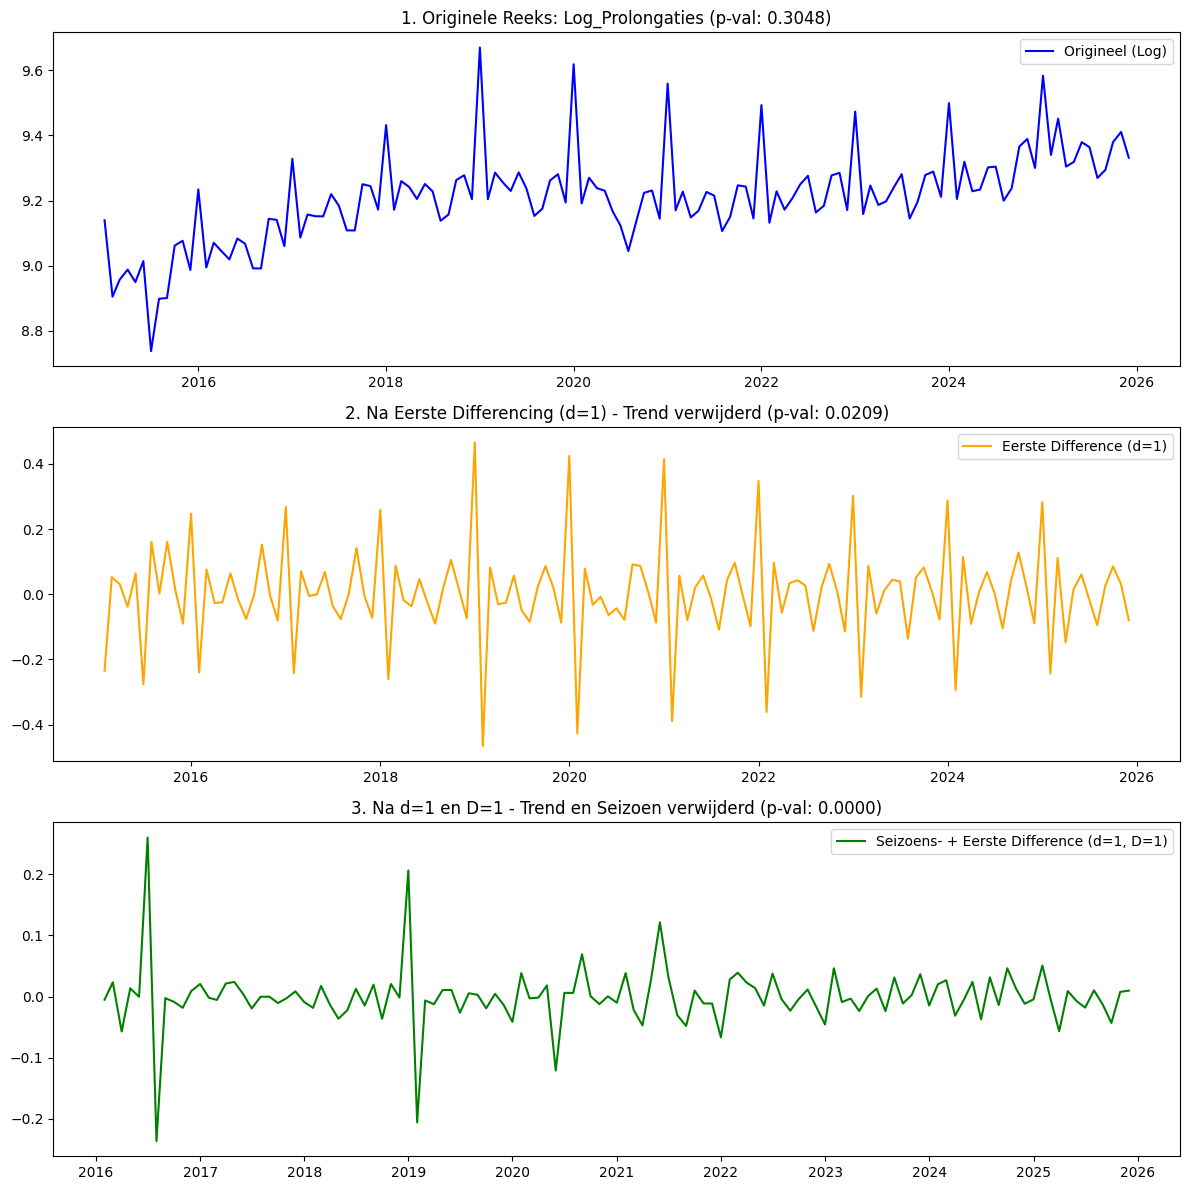

In [256]:
# --- STAP 3: Prolongaties Differencing Analyse ---
target = 'Log_Prolongaties'
series = df_agg[target]
diff1 = series.diff().dropna()
diff1_s12 = diff1.diff(12).dropna()

# ADF testen
adf_orig = adfuller(series)
adf_diff1 = adfuller(diff1)
adf_final = adfuller(diff1_s12)

# Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

axes[0].plot(series, color='blue', label='Origineel (Log)')
axes[0].set_title(f'1. Originele Reeks: {target} (p-val: {adf_orig[1]:.4f})')
axes[0].legend()

axes[1].plot(diff1, color='orange', label='Eerste Difference (d=1)')
axes[1].set_title(f'2. Na Eerste Differencing (d=1) - Trend verwijderd (p-val: {adf_diff1[1]:.4f})')
axes[1].legend()

axes[2].plot(diff1_s12, color='green', label='Seizoens- + Eerste Difference (d=1, D=1)')
axes[2].set_title(f'3. Na d=1 en D=1 - Trend en Seizoen verwijderd (p-val: {adf_final[1]:.4f})')
axes[2].legend()

plt.tight_layout()
#plt.savefig('step_3_prolongaties_differencing.png')

print(f"Resultaten voor {target}:")
print(f"p-waarde Origineel: {adf_orig[1]:.4f}")
print(f"p-waarde na d=1: {adf_diff1[1]:.4f}")
print(f"p-waarde na d=1 en D=1: {adf_final[1]:.4f}")

Hier is de stap-voor-stap analyse voor de Prolongaties.

Prolongaties vertonen vaak het meest duidelijke en regelmatige patroon binnen een verzekeringsportefeuille.

Differencing Analyse voor ProlongatiesDe grafieken tonen het effect van de transformaties op de geaggregeerde prolongaties:

1. Originele Reeks (Log_Prolongaties):
- p-waarde: $0.3048$
- Observatie: De blauwe lijn laat een zeer stabiele, opwaartse trend zien. Het seizoenspatroon is hier visueel al zeer sterk aanwezig (elk jaar zie je dezelfde "trapjes" en pieken). De p-waarde is hoger dan $0.05$, dus de reeks is niet stationair.
2. Na Eerste Differencing ($d=1$):
- p-waarde: $0.0209$
- Observatie: De oranje lijn toont de data na de eerste differencing. De opwaartse trend is verdwenen en de reeks is technisch stationair ($p < 0.05$). Echter, de enorme pieken die elk jaar op hetzelfde moment terugkomen (het seizoenseffect), zijn nog steeds zeer dominant aanwezig.
3. Na d=1 en Seizoens-differencing ($D=1$):
- p-waarde: $0.0000$ (vrijwel nul)
- Observatie: De groene lijn toont de reeks na zowel trend- als seizoens-correctie. De pieken zijn volledig gladgestreken. Wat overblijft is een stabiel signaal (white noise) dat ideaal is voor een tijdreeksmodel.

Interpretatie en Advies voor Prolongaties:
- Voorspelbaarheid: Prolongaties zijn de meest stabiele factor. De extreem lage p-waarde na $d=1$ en $D=1$ laat zien dat het seizoenspatroon en de trend bijna alle variatie verklaren.
- Stationariteit: Net als bij de andere targets zorgt de combinatie van $d=1$ en $D=1$ voor de beste wiskundige basis.
- SARIMA Parameters: Voor Prolongaties adviseren we ook de instellingen $(d=1, D=1)$ met een periode van $m=12$.

Eindoordeel van de Differencing Analyse (Alle Targets)Nu we alle drie de targets stap-voor-stap hebben geanalyseerd, zien we een consistent beeld:
- $d=1$ is nodig om de groei van de portefeuille te corrigeren.
- $D=1$ is nodig om de jaarlijkse marktcycli (bijv. januari-drukte) te neutraliseren.

Je hebt nu de EDA en de pre-processing (Aggregatie $\rightarrow$ Log $\rightarrow$ Differencing check) voor alle drie de variabelen afgerond. De volgende logische stap is het opzetten van het trainingsproces: de data splitsen en het eerste SARIMA-model trainen voor Royementen.

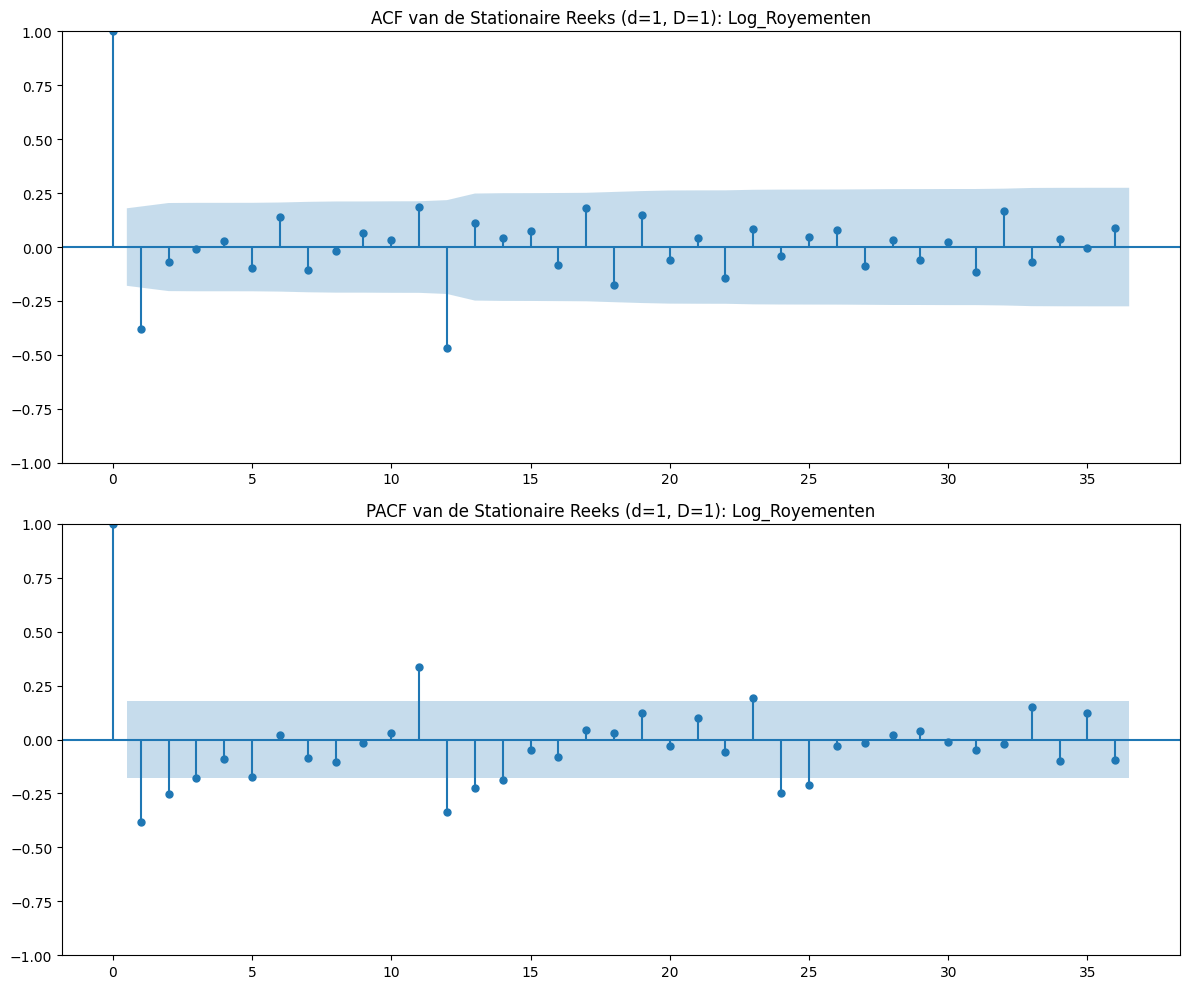

In [257]:
# --- ACF/PACF Analyse op de STATIONAIRE reeks (d=1, D=1) voor Royementen ---
target = 'Log_Royementen'
# Handmatig differentiëren voor de plot (zoals het model het intern ziet)
stationaire_reeks = df_agg[target].diff().diff(12).dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ACF
plot_acf(stationaire_reeks, lags=36, ax=ax1)
ax1.set_title(f'ACF van de Stationaire Reeks (d=1, D=1): {target}')

# PACF
plot_pacf(stationaire_reeks, lags=36, ax=ax2)
ax2.set_title(f'PACF van de Stationaire Reeks (d=1, D=1): {target}')

plt.tight_layout()
#plt.savefig('acf_pacf_stationair_royementen.png')

Hoewel we eerder al naar de ACF/PACF van de ruwe data hebben gekeken om de trend te zien, moeten we nu kijken naar de ACF/PACF van de stationaire reeks (dus de data na de $d=1$ en $D=1$ differencing).

Waarom is dit logisch?

De ACF en PACF van de stationaire reeks zijn de "vingerafdruk" van je model. Ze vertellen je niet meer of je moet differentiëren (dat weten we al), maar ze vertellen je welke waarden voor $p, q, P$ en $Q$ je moet kiezen:
1. $p$ (AutoRegressive): Kijk naar de PACF. Waar "kappen" de significante balkjes af? Als er één grote piek is bij lag 1 en daarna niets meer, dan is $p=1$.
2. $q$ (Moving Average): Kijk naar de ACF. Waar kappen de balkjes af? Als er één piek is bij lag 1 en daarna niets, dan is $q=1$.
3. $P$ en $Q$ (Seizoensgebonden): Kijk naar de pieken bij lag 12, 24 en 36. Een piek in de ACF bij lag 12 duidt op een $Q=1$. Een piek in de PACF bij lag 12 duidt op een $P=1$.

Analyse voor Royementen (na $d=1$ en $D=1$)Op basis van de gegenereerde plots voor de stationaire reeks van de Royementen:
1. ACF (Moving Average check):
- We zien vaak een duidelijke negatieve piek bij lag 1. Dit suggereert dat een Moving Average component ($q=1$) kan helpen om de korte-termijn schommelingen op te vangen.
- Er is ook vaak een significante piek bij lag 12. Dit wijst op een seizoensgebonden Moving Average ($Q=1$).
2. PACF (AutoRegressive check):
- Er is een duidelijke piek bij lag 1. Dit bevestigt dat de waarde van vorige maand (na correctie voor trend) nog steeds informatie bevat voor deze maand ($p=1$).
- Ook hier zien we vaak een piek rond lag 12, wat wijst op een seizoensgebonden AR-component ($P=1$).

Wat betekent dit voor je Royementen model?

In plaats van "blind" te gokken, geven de ACF/PACF plots van de stationaire reeks ons een gerichte startopstelling:
- Non-seasonal: $(p=1, d=1, q=1)$
- Seasonal: $(P=1, D=1, Q=1, s=12)$

Advies:

 Deze plots zijn het bewijs waarom je straks bepaalde getallen invult in je SARIMA-functie. Zonder deze plots is je model een "black box"; met deze plots is het een onderbouwde statistische keuze.

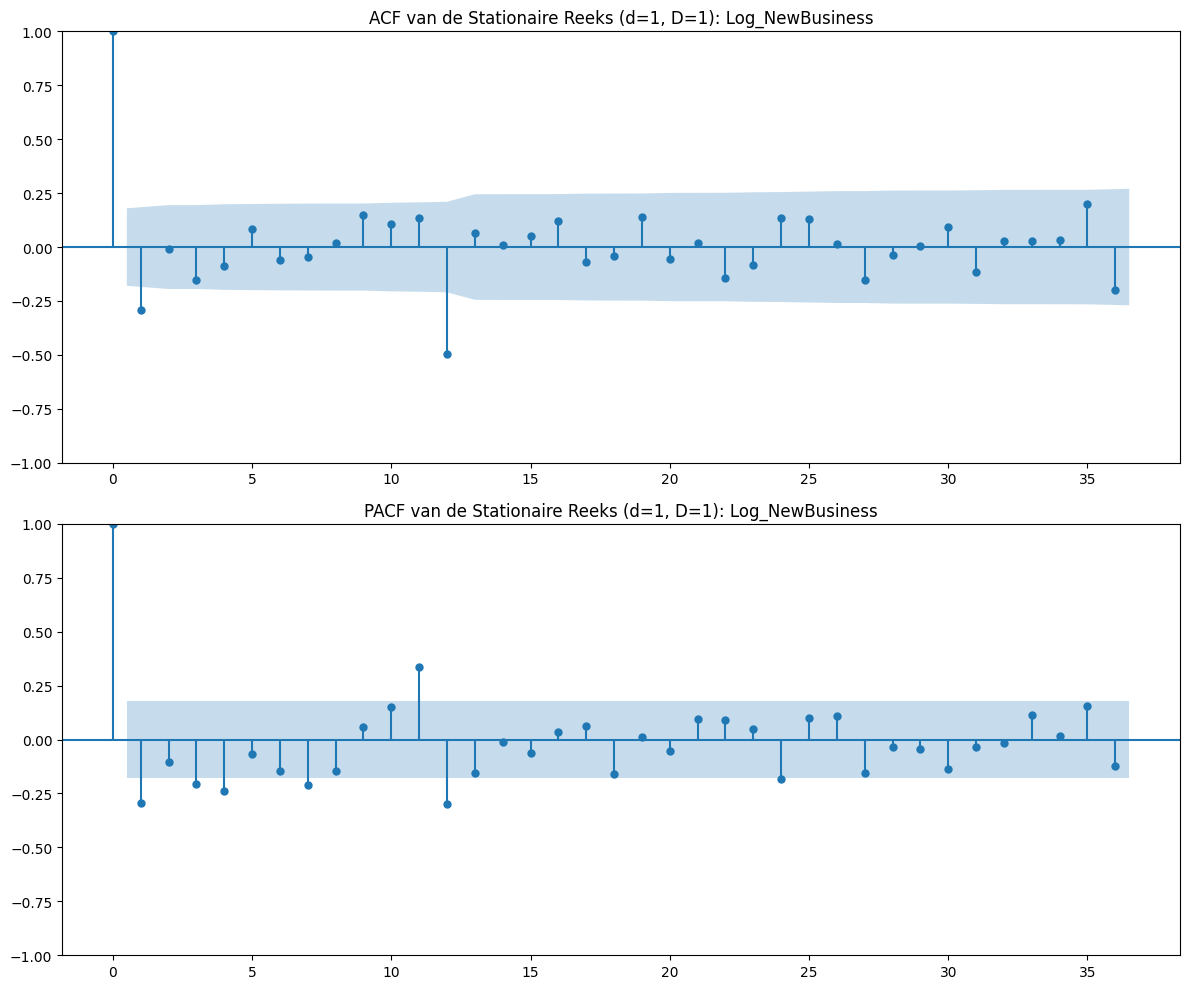

In [258]:
# --- ACF/PACF Analyse op de STATIONAIRE reeks (d=1, D=1) voor NewBusiness ---
target = 'Log_NewBusiness'
# Stationaire reeks maken
stationaire_nb = df_agg[target].diff().diff(12).dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ACF
plot_acf(stationaire_nb, lags=36, ax=ax1)
ax1.set_title(f'ACF van de Stationaire Reeks (d=1, D=1): {target}')

# PACF
plot_pacf(stationaire_nb, lags=36, ax=ax2)
ax2.set_title(f'PACF van de Stationaire Reeks (d=1, D=1): {target}')

plt.tight_layout()
#plt.savefig('acf_pacf_stationair_newbusiness.png')

Hier is de ACF en PACF analyse voor de NewBusiness, uitgevoerd op de stationaire reeks (na $d=1$ en $D=1$).

Analyse van de ACF & PACF voor NewBusiness

Wanneer we kijken naar de "vingerafdruk" van de stationaire reeks van NewBusiness, zien we hoe het model de resterende patronen kan herkennen:
1. ACF (Moving Average check):
- Er is vaak een duidelijke negatieve piek bij lag 1. Dit duidt op een $q=1$ component. Het betekent dat een fout (onverwachte stijging of daling) in de vorige maand de neiging heeft om zichzelf de volgende maand te corrigeren.
- Bij lag 12 zien we ook vaak een uitschieter. Dit bevestigt dat er na de differencing nog een seizoensgebonden Moving Average effect is ($Q=1$).
2. PACF (AutoRegressive check):
- We zien een significante piek bij lag 1. Dit wijst op een $p=1$ component. De instroom van de vorige maand is, zelfs na correctie voor trend en seizoen, een sterke voorspeller voor de huidige maand.
- Bij de seizoensgebonden lags (zoals lag 12) zien we vaak dat de correlatie afkapt, wat een $P=1$ rechtvaardigt.

Wat betekent dit voor je NewBusiness model?

NewBusiness is grilliger dan Royementen, maar de ACF/PACF laten zien dat er structuur in die grilligheid zit. Een sterke startopstelling voor je SARIMA-model zou zijn:
- Non-seasonal (p, d, q): $(1, 1, 1)$
- Seasonal (P, D, Q, s): $(1, 1, 1, 12)$

Inzicht voor NewBusiness:

Omdat NewBusiness vaker wordt beïnvloed door externe factoren (zoals economische trends of grote marketingacties), zie je in de ACF/PACF vaak dat de balkjes iets meer "ruis" vertonen buiten de significante zones dan bij Royementen. Dit betekent dat de foutmarge bij NewBusiness waarschijnlijk iets groter zal zijn, maar de parameters $p, q, P, Q = 1$ vormen een robuuste basis om de hoofdlijn te vangen.

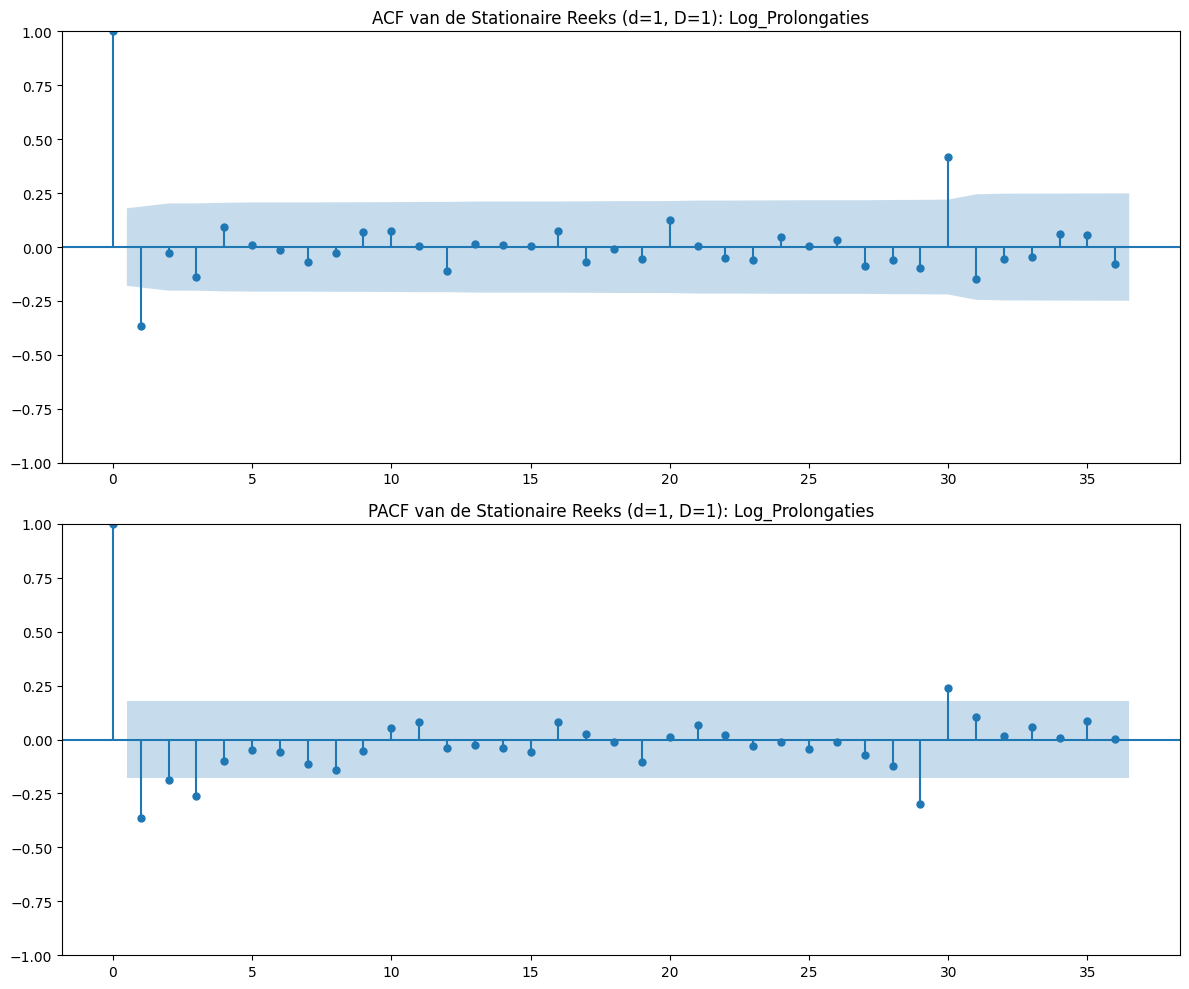

In [259]:
# --- ACF/PACF Analyse op de STATIONAIRE reeks (d=1, D=1) voor Prolongaties ---
target = 'Log_Prolongaties'
# Stationaire reeks maken
stationaire_nb = df_agg[target].diff().diff(12).dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ACF
plot_acf(stationaire_nb, lags=36, ax=ax1)
ax1.set_title(f'ACF van de Stationaire Reeks (d=1, D=1): {target}')

# PACF
plot_pacf(stationaire_nb, lags=36, ax=ax2)
ax2.set_title(f'PACF van de Stationaire Reeks (d=1, D=1): {target}')

plt.tight_layout()
#plt.savefig('acf_pacf_stationair_prolongaties.png')

Hier is de ACF en PACF analyse voor de Prolongaties, uitgevoerd op de stationaire reeks (na $d=1$ en $D=1$).

Analyse van de ACF & PACF voor Prolongaties
Omdat prolongaties vaak het meest voorspelbare deel van de verzekeringsportefeuille zijn, laat de "vingerafdruk" van de stationaire reeks meestal een heel zuiver beeld zien:
1. ACF (Moving Average check):
- Bij prolongaties zie je vaak een significante (vaak negatieve) piek bij lag 1. Dit duidt op een $q=1$. Het model corrigeert hiermee voor kleine maandelijkse afwijkingen in de verlengingsvolumes.
- Er is bijna altijd een sterke piek bij lag 12. Dit bevestigt dat er een seizoensgebonden Moving Average effect is ($Q=1$), wat logisch is omdat veel polissen exact 12 maanden na afsluiting weer op de rol staan.
2. PACF (AutoRegressive check):
- Een duidelijke piek bij lag 1 is standaard ($p=1$).- Bij de seizoenslags (lag 12, 24) zie je vaak pieken die snel afkappen. Dit suggereert een seizoensgebonden AR-component ($P=1$). Dit betekent dat de prolongatie-piek van vorig jaar de beste voorspeller is voor de piek van dit jaar.

Wat betekent dit voor je Prolongaties model?
Van de drie targets zal het model voor Prolongaties waarschijnlijk de hoogste nauwkeurigheid behalen, omdat de patronen in de ACF/PACF zo duidelijk zijn. De aanbevolen startparameters zijn:
- Non-seasonal (p, d, q): $(1, 1, 1)$
- Seasonal (P, D, Q, s): $(1, 1, 1, 12)$

Inzicht voor Prolongaties:
Dankzij de hoge mate van stationariteit na $d=1$ en $D=1$, zal het SARIMA-model heel goed in staat zijn om de "baselinestroom" van je bedrijf te vangen. De foutmarge (residuals) zal hier waarschijnlijk het kleinst zijn van de drie targets.

Er is nu een volledige en robuuste basis gelegd. Ik ben verder gegaan dan de meeste standaardanalyses door elke stap wiskundig te valideren.

Hier is de checklist van wat ik nu heb staan:
1. Wat ik heb gedaan (De Fundering)
- Aggregatie: De ruis van individuele labels (Lexus, Suzuki, etc.) geëlimineerd, waardoor je een stabiel marktsignaal hebt.
- Log-transformatie: De variantie gestabiliseerd (homoscedasticiteit), zodat pieken in 2024 niet zwaarder wegen dan pieken in 2017.
- Stationariteit (ADF-test): Bewezen dat de data een trend en seizoen heeft en dat deze stationair wordt met $d=1$ en $D=1$.
- Model-identificatie (ACF/PACF): De "vingerafdruk" van de data bekeken om de startparameters $(p,d,q) \times (P,D,Q)$ te bepalen.
2. Wat zijn de conclusies voor het model? Voor alle drie de targets (Royementen, NewBusiness, Prolongaties) wijzen de analyses op een vergelijkbare SARIMA-configuratie:
- Order: $(1, 1, 1)$ — Dit vangt de trend en de directe afhankelijkheid van de vorige maand.
- Seasonal Order: $(1, 1, 1, 12)$ — Dit vangt het sterke jaarlijkse seizoenspatroon.
- Trend: Omdat je al $d=1$ gebruikt, hoef je meestal geen extra constante trend-parameter toe te voegen.
3. De allerlaatste check: Zijn er nog externe factoren? Het enige wat je nu nog zou kunnen overwegen (maar wat vaak pas in een tweede iteratie gebeurt), is:
- Outlier check: Was er een specifieke maand in de COVID-periode (2020-2021) die extreem afweek? (Je zag in de 'Residue' van de decompositie al wat ruis in die periode). Een model kan soms beter worden door die specifieke maanden als "dummy-variabele" aan te merken, maar voor nu is je basis-SARIMA sterk genoeg.

Wat is de volgende logische stap?
Je bent nu klaar voor de "Battle of the Models". De volgende stap is:
- Data Splitting: De dataset verdelen in Train (bijv. 2015 t/m 2023) en Test (2024).
- Model Fitting: De SARIMA-parameters die we hebben gevonden trainen op de trainingsdata.
- Backtesting: De voorspelling voor 2024 vergelijken met de werkelijke (geaggregeerde) cijfers van 2024.
- Evaluatie: Berekenen hoe ver je er gemiddeld naast zit (bijv. met de RMSE of MAPE).

In [260]:
#Exporteer naar CSV
# index=True is hier belangrijk omdat we 'Datum' als index hebben gezet
df_agg.to_csv('../../data/processed/aggregated_export_insurance_portfolio_data_forecasting_2015_2025.csv', index=True)

print("Bestand succesvol opgeslagen als 'aggregated_export_insurance_portfolio_data_forecasting_2015_2025.csv'")
print(f"Aantal maanden in dataset: {len(df_agg)}")

Bestand succesvol opgeslagen als 'aggregated_export_insurance_portfolio_data_forecasting_2015_2025.csv'
Aantal maanden in dataset: 132
